#LOAD DATASET


In this section, we import the libraries needed for file uploading, data handling, and visualization. We then upload our accident‐data Excel file from the local machine, load it into a Pandas DataFrame, and display the first few rows to verify that it loaded correctly.

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Load the file
file_path = list(uploaded.keys())[0]
df = pd.read_excel(file_path)

# Display the first few rows
df.head()

Saving RTA Data 2020 to July 2023.xlsx to RTA Data 2020 to July 2023 (1).xlsx


,EcYear,EcNumber,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,HospitalName,Reason,responsetime,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,2020,31486,2020-12-31 22:41:47,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,BBH,Bike Slip,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,31485,2020-12-31 22:25:00,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,NaN,Car hit Footpath,12.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,31483,2020-12-31 21:54:59,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,BBH,Rickshaw hit with Car,10.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,31482,2020-12-31 21:24:22,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,NaN,Car hit Car and runaway,5.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,31479,2020-12-31 21:03:49,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,NaN,Unknown Bike hit Bike and runaway,5.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Data preprocessing and EDA

##Handle missing value


**Inspect the dataset**  
   - Use `df.info()`, `df.describe()`, `df.head()`, and `df.columns` to get an overview of data types, summary statistics, sample rows, and column names.


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46189 entries, 0 to 46188
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   EcYear                    46189 non-null  object        
 1   EcNumber                  38978 non-null  object        
 2   CallTime                  40233 non-null  datetime64[ns]
 3   EmergencyArea             46188 non-null  object        
 4   TotalPatientsInEmergency  46189 non-null  object        
 5   Gender                    46188 non-null  object        
 6   Age                       46188 non-null  float64       
 7   HospitalName              24239 non-null  object        
 8   Reason                    46188 non-null  object        
 9   responsetime              46184 non-null  float64       
 10  EducationTitle            46188 non-null  object        
 11  InjuryType                46187 non-null  object        
 12  Cause             

In [33]:
df.describe()

,CallTime,Age,responsetime,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
count,40233,46188.000000,46184.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000,46187.000000
mean,2021-11-23 18:43:21.099967744,32.447129,6.256106,0.008725,0.967242,0.009202,0.234049,0.001970,0.087297,0.009830,0.002208,0.044948,0.117392,0.009656
min,1900-01-02 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021-01-03 12:01:47,21.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021-12-01 09:01:00,29.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2022-11-03 20:15:00,42.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2023-07-31 17:11:00,118.000000,101.000000,2.000000,10.000000,2.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,4.000000,2.000000
std,NaN,15.176229,4.901342,0.093467,0.578776,0.100349,0.448054,0.044344,0.289319,0.098657,0.046942,0.220947,0.334686,0.098893


In [34]:
df.head()

,EcYear,EcNumber,CallTime,EmergencyArea,TotalPatientsInEmergency,Gender,Age,HospitalName,Reason,responsetime,...,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
0,2020,31486,2020-12-31 22:41:47,NEAR APS SCHOOL FORT ROAD RWP,1,Male,27.0,BBH,Bike Slip,10.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,31485,2020-12-31 22:25:00,"Infront of Daig.com, Near Dha gate 2, gt road...",1,Male,20.0,NaN,Car hit Footpath,12.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,31483,2020-12-31 21:54:59,Muhammadi chowk arshad bakery khyaban e sirsye...,1,Male,48.0,BBH,Rickshaw hit with Car,10.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,31482,2020-12-31 21:24:22,"Gulzar e quaid, T/W Katcheri Near Attock Pump,...",1,Male,45.0,NaN,Car hit Car and runaway,5.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,31479,2020-12-31 21:03:49,Taaj Company Gawalmandi Chowk Liaqat Baag Road...,1,Male,22.0,NaN,Unknown Bike hit Bike and runaway,5.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df.columns

Index(['EcYear', 'EcNumber', 'CallTime', 'EmergencyArea',
       'TotalPatientsInEmergency', 'Gender', 'Age', 'HospitalName', 'Reason',
       'responsetime', 'EducationTitle', 'InjuryType', 'Cause',
       'PatientStatus', 'BicycleInvovled', 'BikesInvolved', 'BusesInvolved',
       'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 'TractorInvovled',
       'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 'OthersInvolved'],
      dtype='object')

**Identify feature types**  
   - Separate columns into **categorical** (`object`, `category`) and **numerical** (`number`) lists for targeted preprocessing.

In [36]:
# Separate categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Print the lists of categorical and numerical columns
print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)

Categorical Columns:
['EcYear', 'EcNumber', 'EmergencyArea', 'TotalPatientsInEmergency', 'Gender', 'HospitalName', 'Reason', 'EducationTitle', 'InjuryType', 'Cause', 'PatientStatus']

Numerical Columns:
['Age', 'responsetime', 'BicycleInvovled', 'BikesInvolved', 'BusesInvolved', 'CarsInvolved', 'CartInvovled', 'RickshawsInvolved', 'TractorInvovled', 'TrainsInvovled', 'TrucksInvolved', 'VansInvolved', 'OthersInvolved']


In [37]:
# Missing values
df.isnull().sum()

,0
EcYear,0
EcNumber,7211
CallTime,5956
EmergencyArea,1
TotalPatientsInEmergency,0
Gender,1
Age,1
HospitalName,21950
Reason,1
responsetime,5


 **Visualize missing data**  
   - Plot a **missing values heatmap** with Seaborn to quickly spot patterns of `NaN` entries across all records and columns.

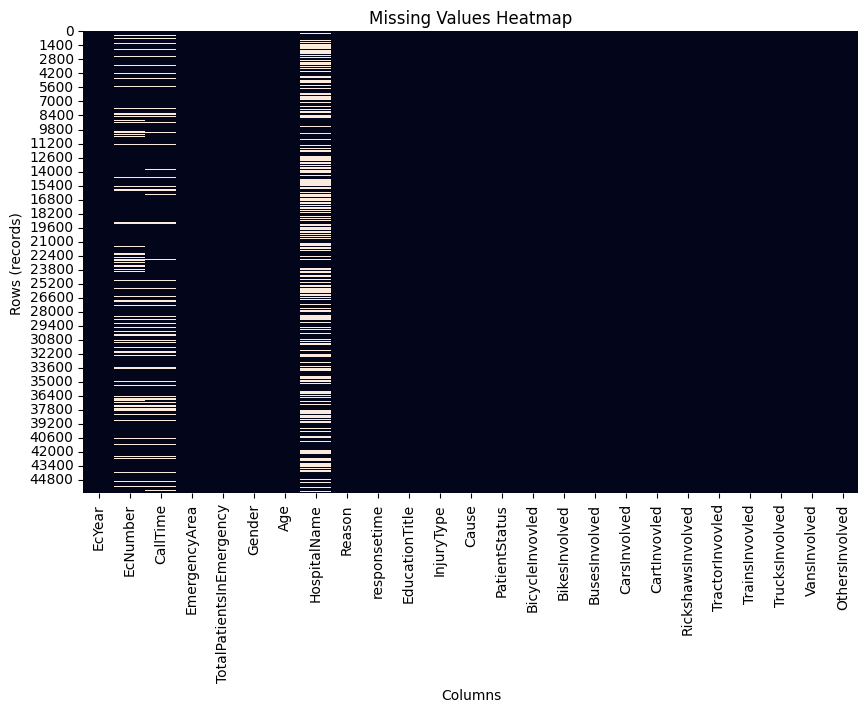

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows (records)")
plt.show()


Columns with lots of white space need extra attention

**Drop irrelevant or high-cardinality columns**  
   - Remove `EcNumber`, `HospitalName`, `EcYear`, and `CallTime` as they are either identifiers or not useful for modeling.

In [39]:
df = df.drop(['EcNumber', 'HospitalName', 'EcYear', 'CallTime'], axis=1)

In [40]:
# Missing values
df.isnull().sum()

,0
EmergencyArea,1
TotalPatientsInEmergency,0
Gender,1
Age,1
Reason,1
responsetime,5
EducationTitle,1
InjuryType,2
Cause,2
PatientStatus,2


**Impute missing values**  
   - **Forward-fill** (`.fillna(method='ffill')`) on key columns (e.g., `Reason`, `responsetime`, `EducationTitle`, all vehicle-count fields, `Age`, `Gender`, `PatientStatus`) to propagate the last valid observation.

In [41]:
forwardfill = [
    'Reason', 'responsetime', 'EducationTitle', 'InjuryType', 'Cause',
    'BicycleInvovled', 'BikesInvolved', 'BusesInvolved', 'CarsInvolved',
    'CartInvovled', 'RickshawsInvolved', 'TractorInvovled', 'TrainsInvovled',
    'TrucksInvolved', 'VansInvolved', 'OthersInvolved', 'Age','Gender' ,'PatientStatus'
]


df[forwardfill] = df[forwardfill].fillna(method='ffill')


df.isnull().sum()

<ipython-input-41-a5da0e5dd916>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[forwardfill] = df[forwardfill].fillna(method='ffill')


,0
EmergencyArea,1
TotalPatientsInEmergency,0
Gender,0
Age,0
Reason,0
responsetime,0
EducationTitle,0
InjuryType,0
Cause,0
PatientStatus,0


 **Handle critical missing entries**  
   - **Drop** any records missing `EmergencyArea`, since this field is essential for geographic and response analysis.

In [42]:
# Drop rows with NaN in EmergencyArea
df.dropna(subset=['EmergencyArea'], inplace=True)

# Verify no more nulls
df.isnull().sum()


,0
EmergencyArea,0
TotalPatientsInEmergency,0
Gender,0
Age,0
Reason,0
responsetime,0
EducationTitle,0
InjuryType,0
Cause,0
PatientStatus,0


**Correlation analysis**  
   - Compute the **correlation matrix** for all numeric features and render a **heatmap** to identify multicollinearity and strong feature relationships.

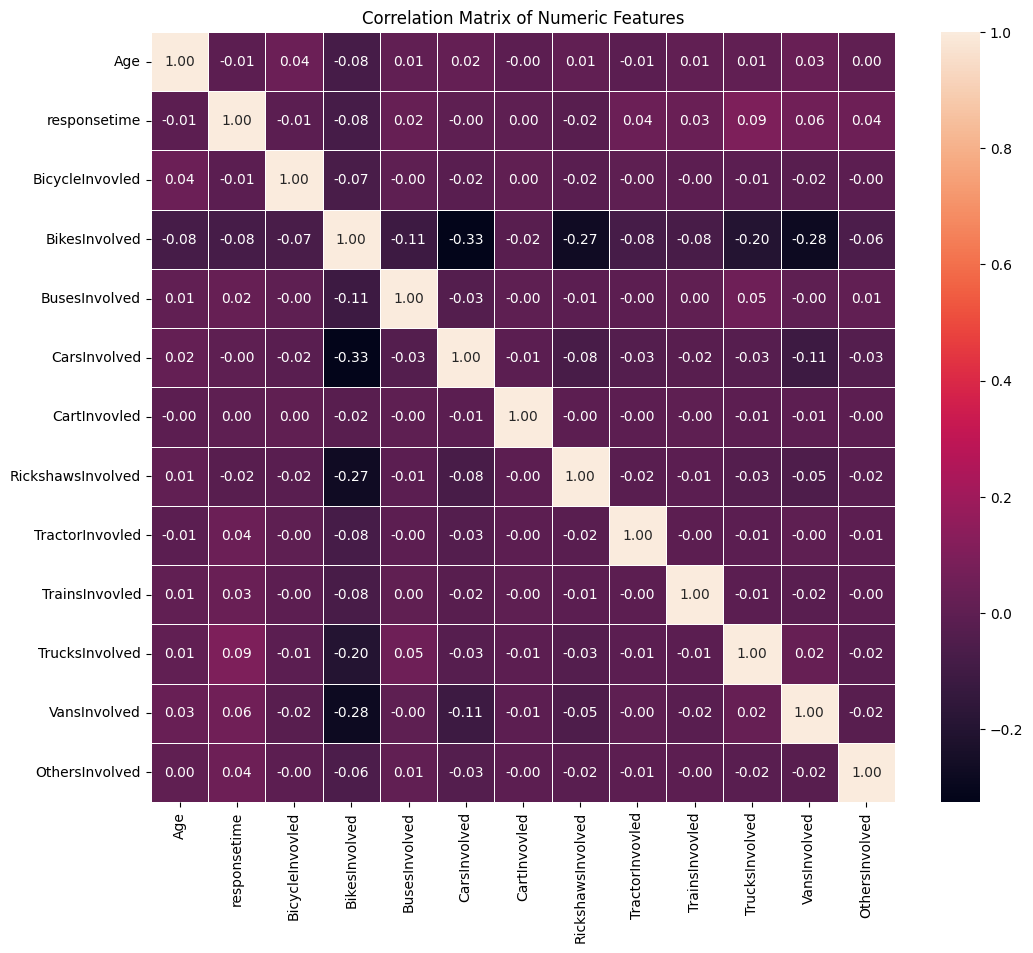

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
# Compute correlations among numeric columns
corr = df.select_dtypes(include='number').corr()

# Draw the heatmap
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


##Duplicate Value


**Eliminate duplicate rows**  
   - Use `df.duplicated().sum()` to count any exact duplicates in the DataFrame  
   - Apply `df.drop_duplicates(inplace=True)` to remove them and ensure each record is unique

In [44]:
df.duplicated().sum()

np.int64(28)

In [45]:
df.drop_duplicates(inplace =True)

**Examine numeric feature distributions**  
   - Select all numeric columns and plot **histograms** (20 bins each) arranged in a grid  
   - Inspect the shape, spread, and skew of each numeric variable to spot outliers or non-standard distributions

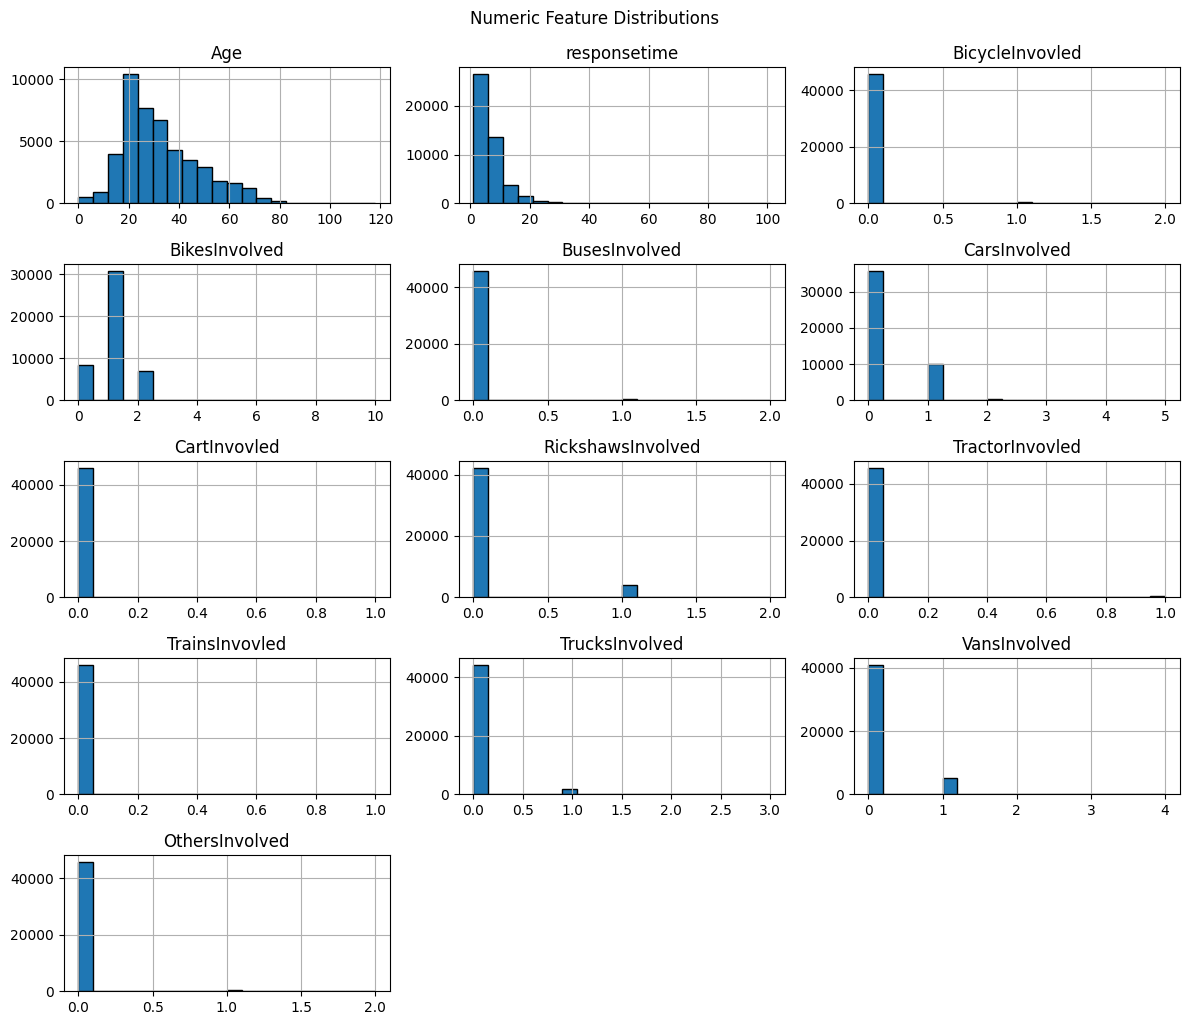

In [46]:
import matplotlib.pyplot as plt

# Select numeric columns
num_cols = df.select_dtypes(include='number').columns.tolist()

# Plot histograms
df[num_cols].hist(
    figsize=(12, 10),
    layout=( (len(num_cols) + 2) // 3, 3 ),  # 3 plots per row
    bins=20,
    edgecolor='black'
)
plt.tight_layout()
plt.suptitle("Numeric Feature Distributions", y=1.02)
plt.show()


**Inspect key categorical variables**  
   - For `InjuryType`, `EducationTitle`, and `PatientStatus`, draw **horizontal count plots**  
   - Order bars by descending frequency to clearly see the most and least common categories  

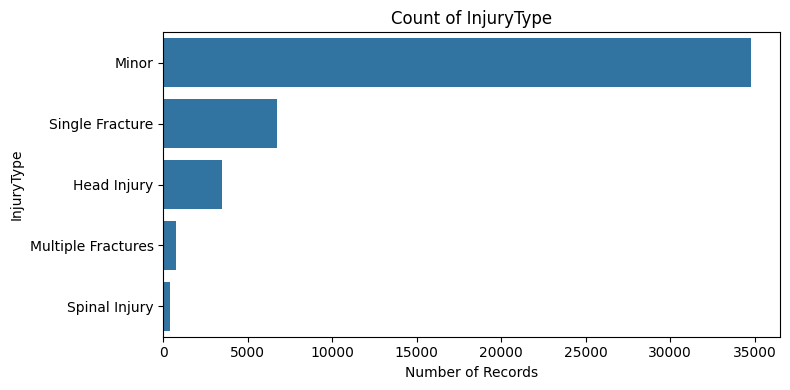

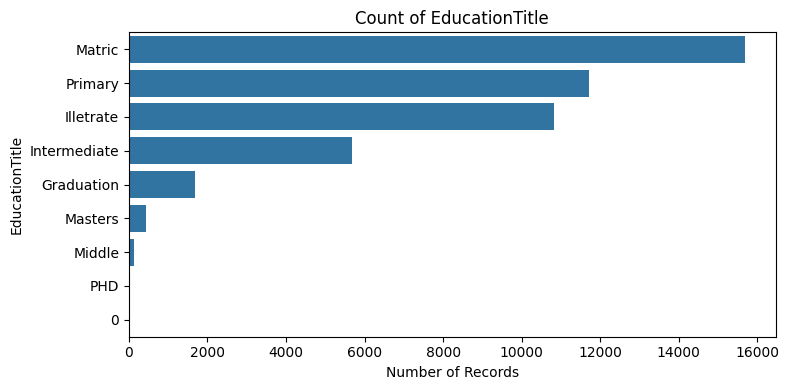

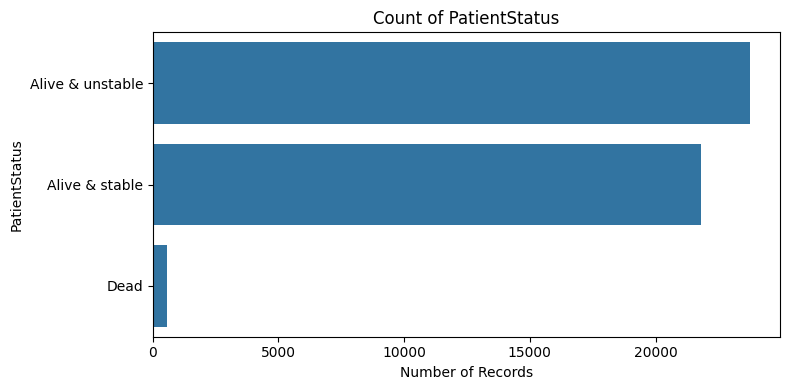

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = ['InjuryType', 'EducationTitle', 'PatientStatus']

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(
        y=col,
        data=df,
        order=df[col].value_counts().index
    )
    plt.title(f"Count of {col}")
    plt.xlabel("Number of Records")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


#Encoding


In this section, we convert key categorical fields into numeric form so our models can process them:


###Ordinal encoding

 **Clean invalid entries**: Drop any rows where `EducationTitle` is `0` or `'0'`, since they don’t map to a real education level.

In [48]:
df['EducationTitle'].value_counts()

,count
EducationTitle,
Matric,15687
Primary,11714
Illetrate,10835
Intermediate,5673
Graduation,1684
Masters,439
Middle,118
PHD,9
0,1


In [49]:
bad_idx = df[df['EducationTitle'].isin([0, '0'])].index
df.drop(bad_idx, inplace=True)

df['EducationTitle'].value_counts()

,count
EducationTitle,
Matric,15687
Primary,11714
Illetrate,10835
Intermediate,5673
Graduation,1684
Masters,439
Middle,118
PHD,9


**Visualize categories**: Plot a bar chart of the remaining education titles to confirm the distribution of levels.  

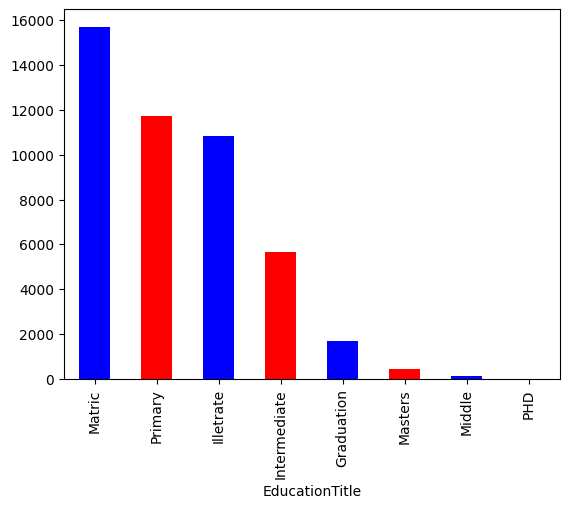

In [50]:
df['EducationTitle'].value_counts().plot(kind='bar', color=['blue', 'red'])


plt.show()

**Apply `OrdinalEncoder`**: Map each education level (e.g. “No Education”, “Primary”, “Secondary”, “Tertiary”, etc.) to a unique integer, preserving their rank order.  

In [51]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df['EducationTitle'] = encoder.fit_transform(df[['EducationTitle']])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46159 entries, 0 to 46188
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46159 non-null  object 
 1   TotalPatientsInEmergency  46159 non-null  object 
 2   Gender                    46159 non-null  object 
 3   Age                       46159 non-null  float64
 4   Reason                    46159 non-null  object 
 5   responsetime              46159 non-null  float64
 6   EducationTitle            46159 non-null  float64
 7   InjuryType                46159 non-null  object 
 8   Cause                     46159 non-null  object 
 9   PatientStatus             46159 non-null  object 
 10  BicycleInvovled           46159 non-null  float64
 11  BikesInvolved             46159 non-null  float64
 12  BusesInvolved             46159 non-null  float64
 13  CarsInvolved              46159 non-null  float64
 14  CartInvovle

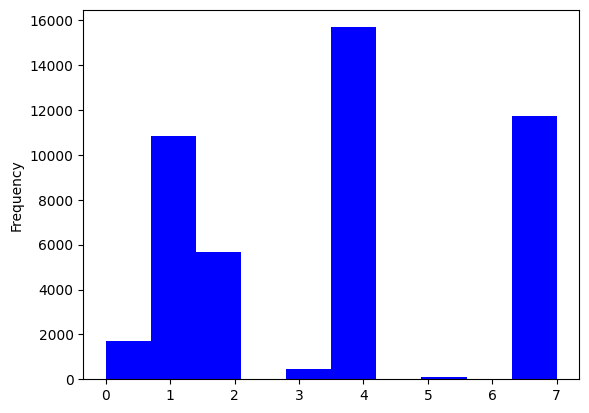

In [52]:
df['EducationTitle'].plot(kind='hist', color=['blue'])


plt.show()

###Patient Status (TARGET)

**Define logical order**: `['Alive & unstable', 'Alive & stable', 'Dead']` so that higher codes correspond to worse outcomes.  

In [53]:
#PatientStatus
df['PatientStatus'].value_counts()

,count
PatientStatus,
Alive & unstable,23764
Alive & stable,21811
Dead,584


**Initialize `OrdinalEncoder` with categories**: Ensures the mapping reflects clinical severity (unstable → stable → dead).  
**Transform the column**: Replace the original string values with integer codes.  

In [54]:
# Define the categories for encoding
PatientStatus = [['Alive & unstable', 'Alive & stable', 'Dead']]

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder(categories=PatientStatus)

# Ensure the column is of type object or string
df['PatientStatus'] = df['PatientStatus']
# Apply the encoder to transform the column
df['PatientStatus'] = encoder.fit_transform(df[['PatientStatus']])

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 46159 entries, 0 to 46188
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46159 non-null  object 
 1   TotalPatientsInEmergency  46159 non-null  object 
 2   Gender                    46159 non-null  object 
 3   Age                       46159 non-null  float64
 4   Reason                    46159 non-null  object 
 5   responsetime              46159 non-null  float64
 6   EducationTitle            46159 non-null  float64
 7   InjuryType                46159 non-null  object 
 8   Cause                     46159 non-null  object 
 9   PatientStatus             46159 non-null  float64
 10  BicycleInvovled           46159 non-null  float64
 11  BikesInvolved             46159 non-null  float64
 12  BusesInvolved             46159 non-null  float64
 13  CarsInvolved              46159 non-null  float64
 14  CartInvovle

In [55]:
df['PatientStatus'].value_counts()

,count
PatientStatus,
0.0,23764
1.0,21811
2.0,584


Distribution of patient status

<ipython-input-56-862bac0324eb>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


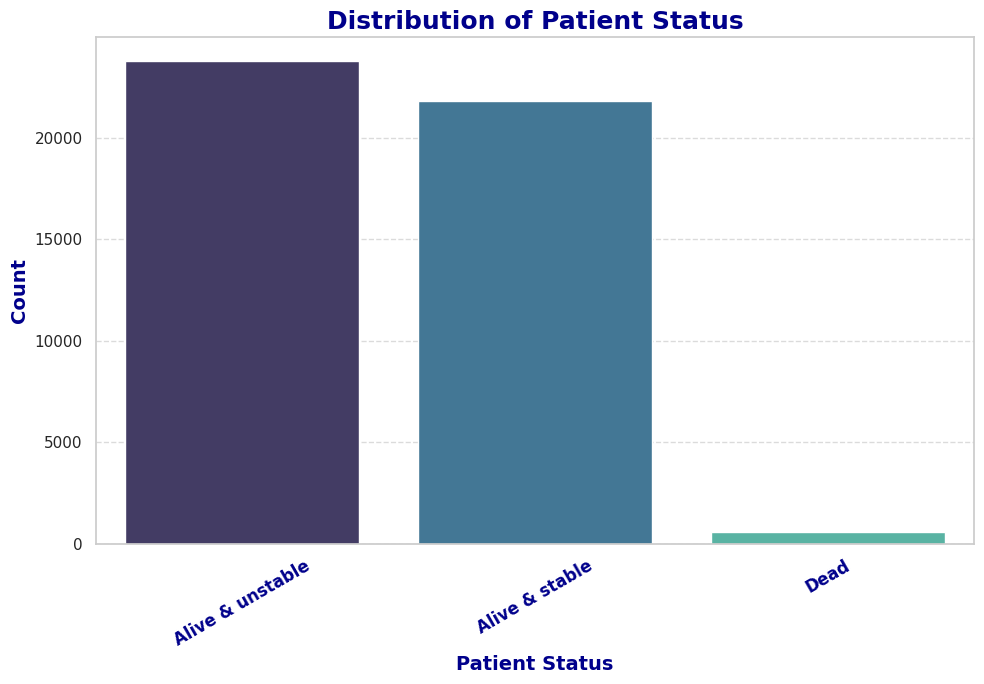

In [56]:
# Ensure PatientStatus contains integers
encoded_values = df['PatientStatus']

# Map the encoded values back to descriptive labels
PatientStatus_mapping = {0: 'Alive & unstable', 1: 'Alive & stable', 2: 'Dead'}
PatientStatus_mapping_labels = [PatientStatus_mapping[val] for val in encoded_values]

# Prepare the plot
plt.figure(figsize=(10, 7))
sns.set_theme(style="whitegrid")

# Define a vibrant color palette
palette = sns.color_palette("mako", len(PatientStatus_mapping))

# Plot the data using a count plot
sns.countplot(
    x=PatientStatus_mapping_labels,
    order=list(PatientStatus_mapping.values()),  # Ensure correct order
    palette=palette
)

# Add a title and labels with custom fonts
plt.title('Distribution of Patient Status', fontsize=18, weight='bold', color="darkblue")
plt.xlabel('Patient Status', fontsize=14, weight='bold', color="darkblue")
plt.ylabel('Count', fontsize=14, weight='bold', color="darkblue")

# Rotate x-axis labels for better readability
plt.xticks(rotation=30, fontsize=12, weight='bold', color="darkblue")

# Add grid lines for better data visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


##Target Encoding

**Compute the target‐encoding map**  
   - Group the data by `InjuryType` and calculate the **mean** of the encoded `PatientStatus` for each injury category.  
   - This yields a mapping from each injury type to its average severity score (0–2).

**Apply the mapping**  
   - Replace the original `InjuryType` strings with their corresponding mean `PatientStatus` values.  
   - Now `df["InjuryType"]` contains numeric scores reflecting the typical outcome associated with each injury.

In [57]:
encoding_map = df.groupby("InjuryType")["PatientStatus"].mean()

# Replace EmergencyArea with the encoded value
df["InjuryType"] = df["InjuryType"].map(encoding_map)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46159 entries, 0 to 46188
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46159 non-null  object 
 1   TotalPatientsInEmergency  46159 non-null  object 
 2   Gender                    46159 non-null  object 
 3   Age                       46159 non-null  float64
 4   Reason                    46159 non-null  object 
 5   responsetime              46159 non-null  float64
 6   EducationTitle            46159 non-null  float64
 7   InjuryType                46159 non-null  float64
 8   Cause                     46159 non-null  object 
 9   PatientStatus             46159 non-null  float64
 10  BicycleInvovled           46159 non-null  float64
 11  BikesInvolved             46159 non-null  float64
 12  BusesInvolved             46159 non-null  float64
 13  CarsInvolved              46159 non-null  float64
 14  CartInvovle

In [58]:
df['InjuryType'].value_counts()

,count
InjuryType,
0.605149,34765
0.096200,6736
0.287797,3499
0.312339,778
0.112861,381


**Compute the target‐encoding map**  
   - Group the data by `InjuryType` and calculate the **mean** of the encoded `PatientStatus` for each injury category.  
   - This yields a mapping from each injury type to its average severity score (0–2).

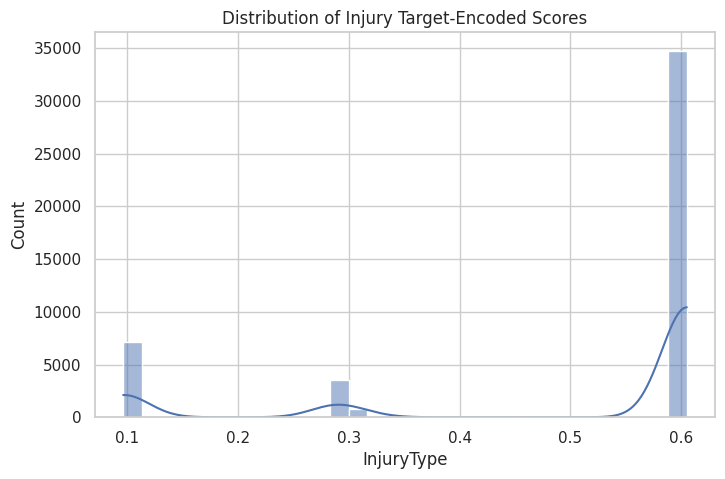

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['InjuryType'], kde=True, bins=30)
plt.title("Distribution of Injury Target‐Encoded Scores")
plt.xlabel("InjuryType")
plt.ylabel("Count")
plt.show()


##Feature Engineering and Encoding

In this section, we create and encode a composite feature that captures the interaction between cause, reason, and location:

**Inspect original values**  
   - Check unique counts for `EmergencyArea`, `Reason`, and `Cause` to understand raw categories.

In [60]:
df['EmergencyArea'].value_counts()

,count
EmergencyArea,
"Railway Track Underpass Nazar Chowk Near Kacheri, Rwp.",42
Cod Chowk Adyala Road Rawalpindi,38
"502 Chowk, Adyala Road, Rwp",33
Near Pc Hotel Signal Mall Road Rwp,31
"22 No. Chungi Damiyal Road, Main Chowk, Rawalpindi",29
...,...
HBL Fort Road rwp,1
"Near Rakshanda Masjid, Adyala Road Rwp",1
Near Dominos Haider Road Saddar Rwp,1


In [61]:
df['Reason'].value_counts()

,count
Reason,
same,2318
Same,1314
Bike Slipped,1223
Same,1012
Bike Slip,957
...,...
Car Hitt the bike during over take (ADK-860 Cultus Car) (ADB-6541 Honda 125),1
Toyota hiace K-9454 hit the to 02 pedestrians while road crossing,1
Bike# (RIL-4150 United 70cc Red) slipped due to over speed.,1


**Clean and standardize `Reason`**  
   - Replace placeholder entries (`'Same'`, `'same'`, `'Same '`, `'.'`) with `NaN`.  
   - Forward‐fill missing `Reason` values using the previous valid entry to preserve temporal context.

In [62]:
df['Reason'] = df['Reason'].replace(['Same', 'same','Same ','.'], pd.NA)

# Forward fill the NaN values with the value from the previous row
df['Reason'] = df['Reason'].fillna(method='ffill')

df['Reason'].value_counts()

<ipython-input-62-a33a3e5d415d>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Reason'] = df['Reason'].fillna(method='ffill')


,count
Reason,
Bike Slipped,1330
Bike Slip,1039
Bike slipped,1018
bike slipped,522
Bike hit the Pedestrian and Runaway,409
...,...
Unknown Car Hitted the Bike ( RLE 3375 Honda 70cc ) due to overspeed and run away,1
Unknown car hit the bike (APF) and run away,1
Bike (RIL 1425China 70 cc) hit the car (LWN 35 CRolla),1


In [63]:
df['Reason'].value_counts()

,count
Reason,
Bike Slipped,1330
Bike Slip,1039
Bike slipped,1018
bike slipped,522
Bike hit the Pedestrian and Runaway,409
...,...
Unknown Car Hitted the Bike ( RLE 3375 Honda 70cc ) due to overspeed and run away,1
Unknown car hit the bike (APF) and run away,1
Bike (RIL 1425China 70 cc) hit the car (LWN 35 CRolla),1


In [64]:
df['Cause'].value_counts()

,count
Cause,
Over Speed,29568
Carelessness,14168
U Turn,933
Wrong Turn,841
Tyre Burst,481
Others,104
One Wheeling,64


 **Combine categorical fields into one feature**  
   - Concatenate `Cause`, cleaned `Reason`, and `EmergencyArea` into a new column `Cause_Reason`
   - Drop the original `Cause`, `Reason`, and `EmergencyArea` columns to avoid redundancy.

In [65]:
df['Cause_Reason'] = df['Cause'] + "_" + df['Reason'] + "_" + df['EmergencyArea']

In [66]:
#drop reason and cause column
df.drop(['Reason', 'Cause','EmergencyArea'], axis=1, inplace=True)

In [67]:
df['Cause_Reason'].value_counts()

,count
Cause_Reason,
"Carelessness_Tractor over truned due to brake fail_ bahria town phase 07 globe chowk, front of baitul islam rwp",12
Over Speed_Truck hit Hi-Ace _Mandra Tolla Plaza GT Road,9
"Carelessness_ Toyota Hiace (RIR-1599) ka tyre brust huwa or road k sath drakht mein jaa k laga_ Infront of AL-HARAM CITY Gate, Chakri Road, RWP",9
"Over Speed_ According to victims due to rain slippery road.. collision between 2 bushes ::::Les 5177 and. caf#4242_ near brahama interchange,motorway t/w peshawer",9
Over Speed_car hit bike_Shah khalid colony main stop Airport raod rwp.,8
...,...
Over Speed_Collision between Bike and Rickshaw _nadra office attock petrol pump,1
Carelessness_Female cloth stuck in bike chain and Fall from Bike _duble road signal rwp,1
Over Speed_Bike hit with Rickshaw _chaklala scheme 3 rwp,1


**Target‐encode the composite feature**  
   - Compute the mean `PatientStatus` (0–2) for each `Cause_Reason` category.  
   - Map each record’s `Cause_Reason` to its corresponding average severity score, turning it into a numeric feature.

In [68]:
encoding_map = df.groupby("Cause_Reason")["PatientStatus"].mean()

# Replace EmergencyArea with the encoded value
df["Cause_Reason"] = df["Cause_Reason"].map(encoding_map)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46159 entries, 0 to 46188
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TotalPatientsInEmergency  46159 non-null  object 
 1   Gender                    46159 non-null  object 
 2   Age                       46159 non-null  float64
 3   responsetime              46159 non-null  float64
 4   EducationTitle            46159 non-null  float64
 5   InjuryType                46159 non-null  float64
 6   PatientStatus             46159 non-null  float64
 7   BicycleInvovled           46159 non-null  float64
 8   BikesInvolved             46159 non-null  float64
 9   BusesInvolved             46159 non-null  float64
 10  CarsInvolved              46159 non-null  float64
 11  CartInvovled              46159 non-null  float64
 12  RickshawsInvolved         46159 non-null  float64
 13  TractorInvovled           46159 non-null  float64
 14  TrainsInvov

In [69]:
df['Cause_Reason'].value_counts()

,count
Cause_Reason,
0.000000,23364
1.000000,21689
2.000000,494
0.500000,352
0.333333,78
0.666667,78
0.400000,20
0.750000,12
0.166667,12


##ONE HOT ENCODING

**Inspect `Gender` values**  
   - Use `df['Gender'].value_counts()` to see the existing categories (e.g. `Male`, `Female`, and any invalid codes).


In [70]:
df['Gender'].value_counts()

,count
Gender,
Male,39769
Female,6389
Other,1


**Inspect `Gender` values**  
   - Use `df['Gender'].value_counts()` to see the existing categories (e.g. `Male`, `Female`, and any invalid codes).


In [71]:
#drop the row where Gender value is '0'
df.drop(df[df['Gender'] == 0].index, inplace=True)
df['Gender'].value_counts()

,count
Gender,
Male,39769
Female,6389
Other,1


 **Apply one‐hot encoding**  
   - Use `pd.get_dummies()` on the `Gender` column to create binary indicator columns (e.g. `Gender_Male`, `Gender_Female`).  
   - This converts the nominal `Gender` feature into a format suitable for machine learning algorithms without implying any ordinal relationship.

In [72]:
#convert gender into one-hot encoding
df = pd.get_dummies(df, columns=['Gender'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46159 entries, 0 to 46188
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TotalPatientsInEmergency  46159 non-null  object 
 1   Age                       46159 non-null  float64
 2   responsetime              46159 non-null  float64
 3   EducationTitle            46159 non-null  float64
 4   InjuryType                46159 non-null  float64
 5   PatientStatus             46159 non-null  float64
 6   BicycleInvovled           46159 non-null  float64
 7   BikesInvolved             46159 non-null  float64
 8   BusesInvolved             46159 non-null  float64
 9   CarsInvolved              46159 non-null  float64
 10  CartInvovled              46159 non-null  float64
 11  RickshawsInvolved         46159 non-null  float64
 12  TractorInvovled           46159 non-null  float64
 13  TrainsInvovled            46159 non-null  float64
 14  TrucksInvol

In [73]:
df['TotalPatientsInEmergency'].value_counts()

,count
TotalPatientsInEmergency,
1,36150
2,7313
3,1567
4,478
5,255
6,131
7,98
8,55
9,45


**Ensuring correct data type**  
   - Cast the column to `float` (`df['TotalPatientsInEmergency'] = df['TotalPatientsInEmergency'].astype(float)`) so it’s ready for numeric analyses.

In [74]:
df['TotalPatientsInEmergency'] = df['TotalPatientsInEmergency'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46159 entries, 0 to 46188
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TotalPatientsInEmergency  46159 non-null  float64
 1   Age                       46159 non-null  float64
 2   responsetime              46159 non-null  float64
 3   EducationTitle            46159 non-null  float64
 4   InjuryType                46159 non-null  float64
 5   PatientStatus             46159 non-null  float64
 6   BicycleInvovled           46159 non-null  float64
 7   BikesInvolved             46159 non-null  float64
 8   BusesInvolved             46159 non-null  float64
 9   CarsInvolved              46159 non-null  float64
 10  CartInvovled              46159 non-null  float64
 11  RickshawsInvolved         46159 non-null  float64
 12  TractorInvovled           46159 non-null  float64
 13  TrainsInvovled            46159 non-null  float64
 14  TrucksInvol

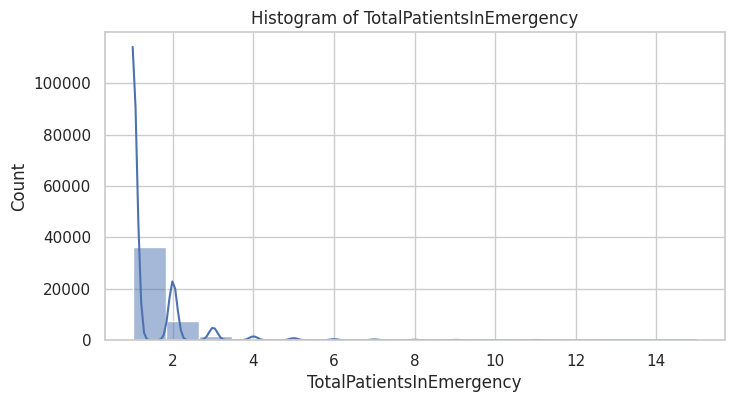

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df['TotalPatientsInEmergency'], kde=True)
plt.title("Histogram of TotalPatientsInEmergency")
plt.xlabel("TotalPatientsInEmergency")
plt.show()


a long right tail (a few very large values) and most data bunched at the low end, that’s a sign a log might help.

**Visualizing distribution shape**  
   - Plot a **histogram with KDE** to observe skewness, modality, and outliers.  
   - Create a **Q–Q plot** against a normal distribution to assess normality assumptions.


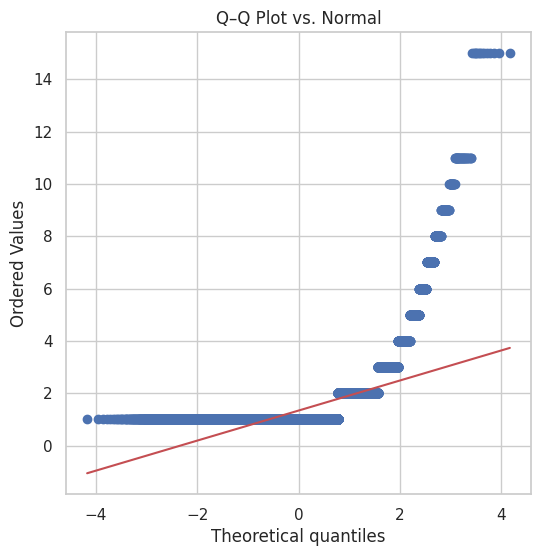

In [76]:
import scipy.stats as stats

plt.figure(figsize=(6,6))
stats.probplot(df['TotalPatientsInEmergency'], dist="norm", plot=plt)
plt.title("Q–Q Plot vs. Normal")
plt.show()


the points curve away from the straight line (especially in the upper tail), data aren’t normal and a log can pull them closer.

 **Applying a log transformation**  
   - Use `np.log1p()` to reduce right skew and stabilize variance, which often helps linear models and many algorithms converge more reliably.


In [77]:
import pandas as pd
import numpy as np

df['TotalPatientsInEmergency'] = np.log1p(df['TotalPatientsInEmergency'])

In [78]:
df['TotalPatientsInEmergency'].value_counts()

,count
TotalPatientsInEmergency,
0.693147,36150
1.098612,7313
1.386294,1567
1.609438,478
1.791759,255
1.945910,131
2.079442,98
2.197225,55
2.302585,45


###Before-vs-After Overlay

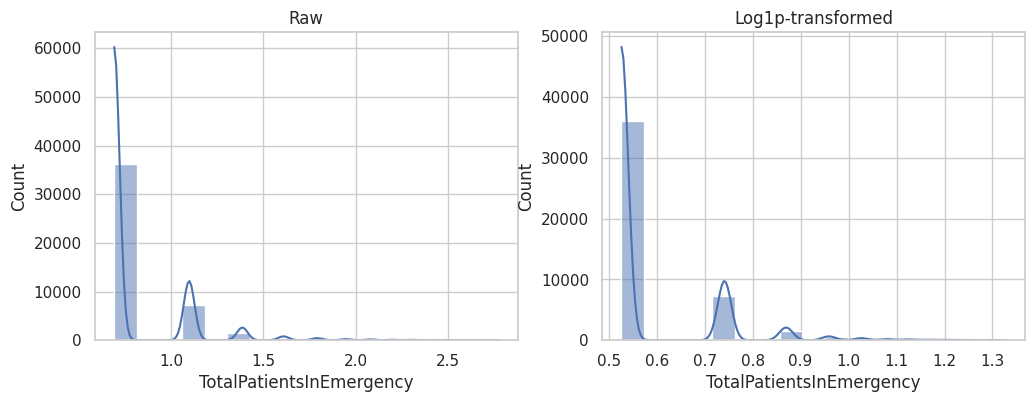

In [79]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.histplot(df['TotalPatientsInEmergency'], ax=axes[0], kde=True).set(title="Raw")
sns.histplot(np.log1p(df['TotalPatientsInEmergency']), ax=axes[1], kde=True).set(title="Log1p-transformed")
plt.show()


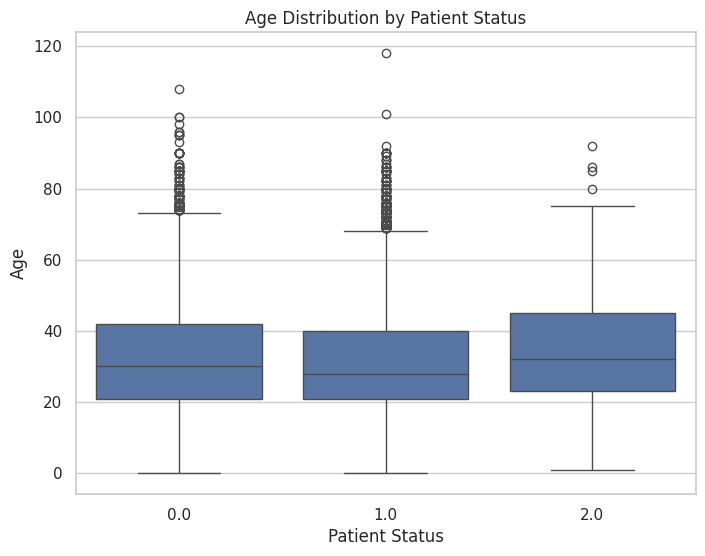

In [80]:
plt.figure(figsize=(8,6))
sns.boxplot(x='PatientStatus', y='Age', data=df)
plt.xlabel("Patient Status")
plt.ylabel("Age")
plt.title("Age Distribution by Patient Status")
plt.show()


#Spliting

In this section, we:

1. **Separate features and target**  
   - `X = df.drop('PatientStatus', axis=1)`  
   - `y = df['PatientStatus']`

2. **First split: Train vs. Test (80/20)**  
   - Call `train_test_split` with `test_size=0.20`, `random_state=42`, and `stratify=y` to hold out 20% of the data for final evaluation, preserving class proportions.

3. **Second split: Train vs. Validation (60/20/20 overall)**  
   - Split the remaining 80% training set into 75% train and 25% validation (`test_size=0.25`), which equates to 60%/20%/20% of the full dataset.  
   - Use the same `random_state=42` and `stratify=y_train` to keep the target balance in each subset.

4. **Confirm dataset sizes**  
   - Print shapes of `X_train`, `X_val`, and `X_test` to verify we have the intended number of samples in each split.

This ensures we have separate data for model training, hyperparameter tuning, and unbiased performance testing.  

In [81]:
from sklearn.model_selection import train_test_split

X = df.drop('PatientStatus', axis=1)
y = df['PatientStatus']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.25,         # 0.25 * 0.80 = 0.20 of total
    random_state=42,
    stratify=y_train
)

print(f"Train set:   {X_train.shape[0]} samples")
print(f"Validation:  {X_val.shape[0]} samples")
print(f"Test set:    {X_test.shape[0]} samples")


Train set:   27695 samples
Validation:  9232 samples
Test set:    9232 samples


# Logistic Regression Model Training & Evaluation


## Logistic Regression

- **Train**: Fit `LogisticRegression(max_iter=1000, random_state=42)` on the training data.  
- **Predict**: Generate labels for the validation set.  
- **Evaluate**: Calculate accuracy, weighted precision, recall, and F1 score to benchmark performance.  


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize & train
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Predict on validation set
y_pred_lr = lr.predict(X_val)

# Compute metrics
accuracy_validation_LR   = accuracy_score(y_val, y_pred_lr)
precision_validation_LR  = precision_score(y_val, y_pred_lr, average='weighted', zero_division=0)
recall_validation_LR     = recall_score(y_val, y_pred_lr, average='weighted', zero_division=0)
f1_score_validation_LR   = f1_score(y_val, y_pred_lr, average='weighted', zero_division=0)

# Print results
print(" Logistic Regression Validation Metrics")
print(f"Accuracy:  {accuracy_validation_LR:.4f}")
print(f"Precision: {precision_validation_LR:.4f}")
print(f"Recall:    {recall_validation_LR:.4f}")
print(f"F1 Score:  {f1_score_validation_LR:.4f}")


 Logistic Regression Validation Metrics
Accuracy:  0.9946
Precision: 0.9946
Recall:    0.9946
F1 Score:  0.9946


# Decision Tree Model Training & Evaluation


## Decision Tree

- **Train**: Fit `DecisionTreeClassifier(random_state=42)` on the training data.  
- **Predict**: Generate labels for the validation set.  
- **Evaluate**: Compute accuracy, weighted precision, recall, and F1 score to assess model performance.  


In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize & train
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on validation set
y_pred_dt = dt.predict(X_val)

# Compute metrics
accuracy_validation_DT   = accuracy_score(y_val, y_pred_dt)
precision_validation_DT  = precision_score(y_val, y_pred_dt, average='weighted', zero_division=0)
recall_validation_DT     = recall_score(y_val, y_pred_dt, average='weighted', zero_division=0)
f1_score_validation_DT   = f1_score(y_val, y_pred_dt, average='weighted', zero_division=0)

# Print results
print(" Decision Tree Validation Metrics")
print(f"Accuracy:  {accuracy_validation_DT:.4f}")
print(f"Precision: {precision_validation_DT:.4f}")
print(f"Recall:    {recall_validation_DT:.4f}")
print(f"F1 Score:  {f1_score_validation_DT:.4f}")


 Decision Tree Validation Metrics
Accuracy:  0.9935
Precision: 0.9935
Recall:    0.9935
F1 Score:  0.9935


# SVM Model Training & Evaluation


- **Compile metrics**: We collect accuracy, precision, recall, and F1 score for each model into a single DataFrame `df_comparison`.
- **Display results**: Running `df_comparison` shows a side-by-side comparison of Logistic Regression, Decision Tree, and SVM on the validation set.
- **Interpret**: Use this table to identify the best-performing model (e.g., highest F1 score for balanced classification) and guide your choice for final testing or ensemble methods.  


## SVM

- **Train**: Fit `SVC(random_state=42)` on the training data.  
- **Predict**: Generate labels for the validation set.  
- **Evaluate**: Compute accuracy, weighted precision, recall, and F1 score to assess performance.  


In [84]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize & train
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Predict on validation set
y_pred_svm = svm.predict(X_val)

# Compute metrics
accuracy_validation_SVM   = accuracy_score(y_val, y_pred_svm)
precision_validation_SVM  = precision_score(y_val, y_pred_svm, average='weighted', zero_division=0)
recall_validation_SVM     = recall_score(y_val, y_pred_svm, average='weighted', zero_division=0)
f1_score_validation_SVM   = f1_score(y_val, y_pred_svm, average='weighted', zero_division=0)

# Print results
print(" SVM Validation Metrics")
print(f"Accuracy:  {accuracy_validation_SVM:.4f}")
print(f"Precision: {precision_validation_SVM:.4f}")
print(f"Recall:    {recall_validation_SVM:.4f}")
print(f"F1 Score:  {f1_score_validation_SVM:.4f}")


 SVM Validation Metrics
Accuracy:  0.9819
Precision: 0.9696
Recall:    0.9819
F1 Score:  0.9757


# Model Performance Comparison



In [85]:
import pandas as pd

# Compile metrics into a DataFrame
metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'SVM'],
    'Accuracy': [accuracy_validation_LR, accuracy_validation_DT, accuracy_validation_SVM],
    'Precision': [precision_validation_LR, precision_validation_DT, precision_validation_SVM],
    'Recall': [recall_validation_LR, recall_validation_DT, recall_validation_SVM],
    'F1 Score': [f1_score_validation_LR, f1_score_validation_DT, f1_score_validation_SVM]
}

df_comparison = pd.DataFrame(metrics).set_index('Model')


df_comparison




,Accuracy,Precision,Recall,F1 Score
Model,,,,
Logistic Regression,0.994584,0.994555,0.994584,0.994555
Decision Tree,0.993501,0.993481,0.993501,0.993482
SVM,0.981911,0.969623,0.981911,0.975690


# Test Set Evaluation for All Models


###  Evaluate on Held-Out Test Set


- **Predict** on the held-out test set with each trained model (`lr`, `dt`, `svm`).  
- **Compute** accuracy, weighted precision, recall, and F1 score to measure real‐world performance.


In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression
y_test_pred_lr = lr.predict(X_test)
accuracy_test_LR    = accuracy_score(y_test, y_test_pred_lr)
precision_test_LR   = precision_score(y_test, y_test_pred_lr, average='weighted', zero_division=0)
recall_test_LR      = recall_score(y_test, y_test_pred_lr, average='weighted', zero_division=0)
f1_test_LR          = f1_score(y_test, y_test_pred_lr, average='weighted', zero_division=0)

print(" Logistic Regression Test Metrics")
print(f"Accuracy:  {accuracy_test_LR:.4f}")
print(f"Precision: {precision_test_LR:.4f}")
print(f"Recall:    {recall_test_LR:.4f}")
print(f"F1 Score:  {f1_test_LR:.4f}\n")

# Decision Tree
y_test_pred_dt = dt.predict(X_test)
accuracy_test_DT    = accuracy_score(y_test, y_test_pred_dt)
precision_test_DT   = precision_score(y_test, y_test_pred_dt, average='weighted', zero_division=0)
recall_test_DT      = recall_score(y_test, y_test_pred_dt, average='weighted', zero_division=0)
f1_test_DT          = f1_score(y_test, y_test_pred_dt, average='weighted', zero_division=0)

print(" Decision Tree Test Metrics")
print(f"Accuracy:  {accuracy_test_DT:.4f}")
print(f"Precision: {precision_test_DT:.4f}")
print(f"Recall:    {recall_test_DT:.4f}")
print(f"F1 Score:  {f1_test_DT:.4f}\n")

# SVM
y_test_pred_svm = svm.predict(X_test)
accuracy_test_SVM    = accuracy_score(y_test, y_test_pred_svm)
precision_test_SVM   = precision_score(y_test, y_test_pred_svm, average='weighted', zero_division=0)
recall_test_SVM      = recall_score(y_test, y_test_pred_svm, average='weighted', zero_division=0)
f1_test_SVM          = f1_score(y_test, y_test_pred_svm, average='weighted', zero_division=0)

print(" SVM Test Metrics")
print(f"Accuracy:  {accuracy_test_SVM:.4f}")
print(f"Precision: {precision_test_SVM:.4f}")
print(f"Recall:    {recall_test_SVM:.4f}")
print(f"F1 Score:  {f1_test_SVM:.4f}")


 Logistic Regression Test Metrics
Accuracy:  0.9930
Precision: 0.9929
Recall:    0.9930
F1 Score:  0.9929

 Decision Tree Test Metrics
Accuracy:  0.9922
Precision: 0.9922
Recall:    0.9922
F1 Score:  0.9922

 SVM Test Metrics
Accuracy:  0.9802
Precision: 0.9679
Recall:    0.9802
F1 Score:  0.9740


### 5-Fold Cross-Validation


- **Define** a scoring dictionary (`accuracy`, `precision_weighted`, `recall_weighted`, `f1_weighted`).  
- **Run** `cross_validate` with `cv=5` on the full dataset for each model.  
- **Report** the mean ± standard deviation of each metric to assess model consistency and robustness.  

In [87]:
from sklearn.model_selection import cross_validate

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_weighted',
    'recall': 'recall_weighted',
    'f1': 'f1_weighted'
}

# Logistic Regression CV
cv_lr = cross_validate(lr, X, y, cv=5, scoring=scoring, return_train_score=False)
print("Logistic Regression 5-Fold CV")
for metric in scoring:
    scores = cv_lr[f'test_{metric}']
    print(f"{metric.title():>9}: {scores.mean():.4f} ± {scores.std():.4f}")
print()

# Decision Tree CV
cv_dt = cross_validate(dt, X, y, cv=5, scoring=scoring, return_train_score=False)
print("Decision Tree 5-Fold CV")
for metric in scoring:
    scores = cv_dt[f'test_{metric}']
    print(f"{metric.title():>9}: {scores.mean():.4f} ± {scores.std():.4f}")
print()

# SVM CV
cv_svm = cross_validate(svm, X, y, cv=5, scoring=scoring, return_train_score=False)
print("SVM 5-Fold CV")
for metric in scoring:
    scores = cv_svm[f'test_{metric}']
    print(f"{metric.title():>9}: {scores.mean():.4f} ± {scores.std():.4f}")


Logistic Regression 5-Fold CV
 Accuracy: 0.9929 ± 0.0011
Precision: 0.9929 ± 0.0011
   Recall: 0.9929 ± 0.0011
       F1: 0.9929 ± 0.0011

Decision Tree 5-Fold CV
 Accuracy: 0.9914 ± 0.0012
Precision: 0.9915 ± 0.0011
   Recall: 0.9914 ± 0.0012
       F1: 0.9914 ± 0.0012



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

SVM 5-Fold CV
 Accuracy: 0.9806 ± 0.0017
Precision: 0.9683 ± 0.0017
   Recall: 0.9806 ± 0.0017
       F1: 0.9744 ± 0.0017


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Error Analysis

We’ll generate a **classification report** and **normalized confusion matrix** for each model on the held-out **test** set, then peek at a few misclassified examples.


## Logistic Regression — Classification Report
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      4753
         1.0       0.99      0.99      0.99      4362
         2.0       0.95      0.87      0.91       117

    accuracy                           0.99      9232
   macro avg       0.98      0.95      0.97      9232
weighted avg       0.99      0.99      0.99      9232



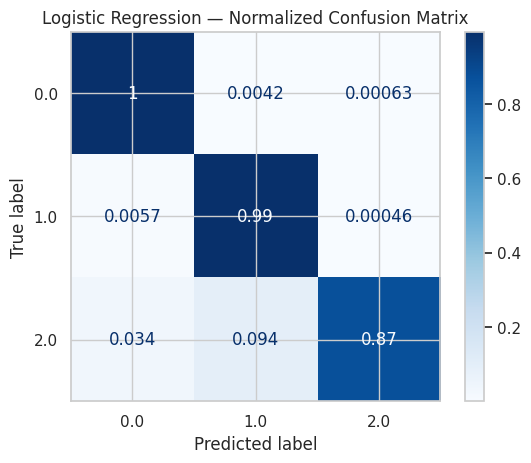

## Decision Tree — Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4753
         1.0       0.99      0.99      0.99      4362
         2.0       0.93      0.90      0.91       117

    accuracy                           0.99      9232
   macro avg       0.97      0.96      0.97      9232
weighted avg       0.99      0.99      0.99      9232



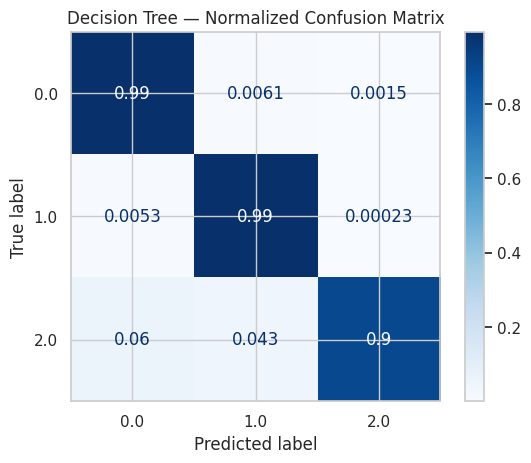

## SVM — Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4753
         1.0       0.97      0.99      0.98      4362
         2.0       0.00      0.00      0.00       117

    accuracy                           0.98      9232
   macro avg       0.65      0.66      0.66      9232
weighted avg       0.97      0.98      0.97      9232



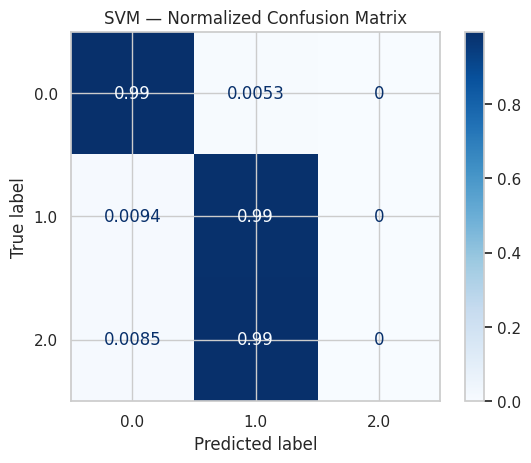

In [88]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

models = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'SVM': svm
}

for name, model in models.items():
    print(f"## {name} — Classification Report")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, zero_division=0))

    # Plot normalized confusion matrix
    disp = ConfusionMatrixDisplay.from_estimator(
        model, X_test, y_test,
        normalize='true',  # shows recall per class
        cmap='Blues',
        display_labels=model.classes_
    )
    disp.ax_.set_title(f"{name} — Normalized Confusion Matrix")
    plt.show()


###Inspect Misclassified Samples

Let’s look at the first few cases where each model got the label wrong.


In [89]:
# Example for Logistic Regression:
import pandas as pd

# Boolean mask for misclassified rows
mask_lr = y_test != lr.predict(X_test)
mis_lr = X_test[mask_lr].copy()

# Add true & predicted labels
mis_lr['true_label'] = y_test[mask_lr]
mis_lr['predicted']  = lr.predict(X_test[mask_lr])

# Show first 10 misclassified examples
mis_lr.head(10)


,TotalPatientsInEmergency,Age,responsetime,EducationTitle,InjuryType,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,...,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved,Cause_Reason,Gender_Female,Gender_Male,Gender_Other,true_label,predicted
16498,1.098612,18.0,15.0,4.0,0.287797,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,False,True,False,2.0,1.0
38209,1.098612,40.0,4.0,1.0,0.312339,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,False,True,False,2.0,1.0
23889,2.079442,40.0,3.0,1.0,0.605149,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.500000,True,False,False,1.0,0.0
42496,1.945910,27.0,13.0,7.0,0.605149,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.000000,False,True,False,1.0,2.0
37791,2.079442,55.0,4.0,1.0,0.605149,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.166667,False,True,False,1.0,0.0
39316,1.386294,45.0,5.0,7.0,0.287797,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.666667,False,True,False,2.0,0.0
36452,1.945910,34.0,21.0,7.0,0.605149,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.500000,False,True,False,0.0,2.0
34987,1.098612,16.0,14.0,4.0,0.605149,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.500000,False,True,False,1.0,0.0
9263,1.098612,65.0,3.0,1.0,0.287797,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.000000,False,True,False,2.0,1.0
10690,1.386294,65.0,22.0,1.0,0.605149,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.500000,True,False,False,1.0,0.0


# Feature Importance


**Logistic Regression**  
  - Compute the mean of the absolute coefficients (`np.abs(lr.coef_)`) to rank features by their overall effect on the log‐odds.  

In [90]:
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance

## Logistic Regression Feature Importance
coef_abs = np.mean(np.abs(lr.coef_), axis=0)
importance_lr = pd.Series(coef_abs, index=X_train.columns).sort_values(ascending=False)

# Show top 10
print("Top 10 features by LR importance:")
importance_lr.head(10)

Top 10 features by LR importance:


,0
Cause_Reason,6.898550
InjuryType,2.587583
TotalPatientsInEmergency,1.690644
TrucksInvolved,0.797220
BusesInvolved,0.765290
TrainsInvovled,0.451083
RickshawsInvolved,0.426039
OthersInvolved,0.362820
TractorInvovled,0.326901
Gender_Female,0.324796


**Decision Tree**  
  - Use `dt.feature_importances_` to see which splits contribute most to reducing impurity.  


In [91]:
##  Decision Tree Feature Importance
importance_dt = pd.Series(dt.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Show top 10
print("Top 10 features by DT importance:")
importance_dt.head(10)


Top 10 features by DT importance:


,0
Cause_Reason,0.976245
Age,0.005357
InjuryType,0.005194
TotalPatientsInEmergency,0.003673
responsetime,0.003228
EducationTitle,0.002249
TrucksInvolved,0.001099
CarsInvolved,0.000810
VansInvolved,0.000750
BikesInvolved,0.000711


**SVM (Permutation Importance)**  
  - Apply `permutation_importance` on the test set to measure the drop in accuracy when each feature is shuffled.  

In [92]:
# This measures the drop in accuracy when each feature is shuffled
perm_res = permutation_importance(
    svm, X_test, y_test,
    n_repeats=10, random_state=42, n_jobs=-1
)
importance_svm = pd.Series(perm_res.importances_mean, index=X_train.columns).sort_values(ascending=False)




**Top Features**  
  - Print the top 10 from each method to compare which variables consistently drive model performance.  

In [93]:
# Show top 10
print("Top 10 features by SVM permutation importance:")
importance_svm.head(10)

Top 10 features by SVM permutation importance:


,0
Cause_Reason,0.483557
InjuryType,0.000552
responsetime,0.000325
Gender_Female,0.000141
Gender_Male,0.000141
BikesInvolved,0.000076
EducationTitle,0.000054
TrucksInvolved,0.000054
CarsInvolved,0.000032
RickshawsInvolved,0.000011


# Plot Learning Curves for Each Model


We’ll use `sklearn.model_selection.learning_curve` to see how train vs. validation scores evolve as we increase training set size.


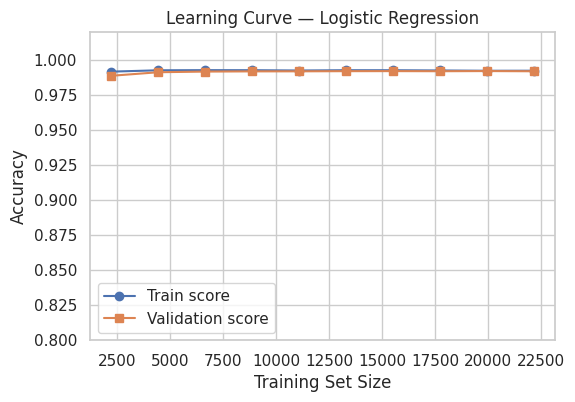

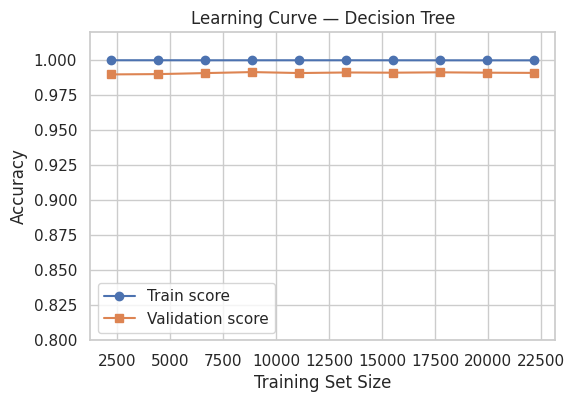

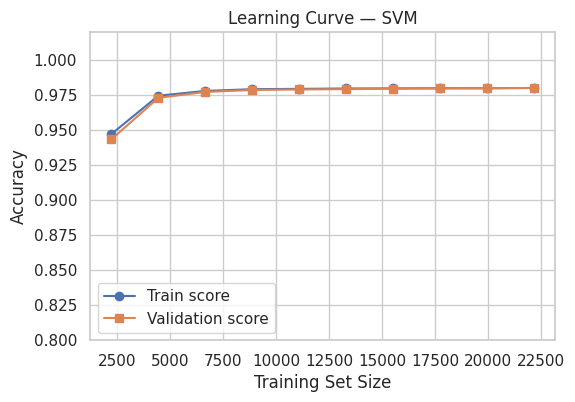

In [94]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

models = {
    'Logistic Regression': lr,
    'Decision Tree': dt,
    'SVM': svm
}

# common arguments for learning_curve
lc_kwargs = {
    'X': X_train,
    'y': y_train,
    'cv': 5,
    'scoring': 'accuracy',
    'train_sizes': np.linspace(0.1, 1.0, 10),
    'n_jobs': -1,
    'shuffle': True,
    'random_state': 42
}

for name, model in models.items():
    train_sizes, train_scores, val_scores = learning_curve(
        estimator=model, **lc_kwargs
    )
    train_mean = train_scores.mean(axis=1)
    val_mean   = val_scores.mean(axis=1)

    plt.figure(figsize=(6,4))
    plt.plot(train_sizes, train_mean, 'o-', label='Train score')
    plt.plot(train_sizes, val_mean,   's-', label='Validation score')
    plt.title(f'Learning Curve — {name}')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.ylim(0.8, 1.02)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


#Hyperparameter Tuning

## Logistic Regression Hyperparameter Tuning

- **Param Grid**: Test regularization strengths `C = [0.01, 0.1, 1, 10, 100]`.  
- **Grid Search**: Use `GridSearchCV` (5-fold CV, accuracy scoring) on `LogisticRegression(max_iter=2000)`.  
- **Fit**: Train the grid search on `X_train` / `y_train`.  
- **Best Params**: Retrieve `grid_lr.best_params_` for the optimal `C`.  
- **Visualization**: Plot mean CV accuracy vs. `C` (log scale) to see how regularization affects performance.  

Best LR params: {'C': 1}


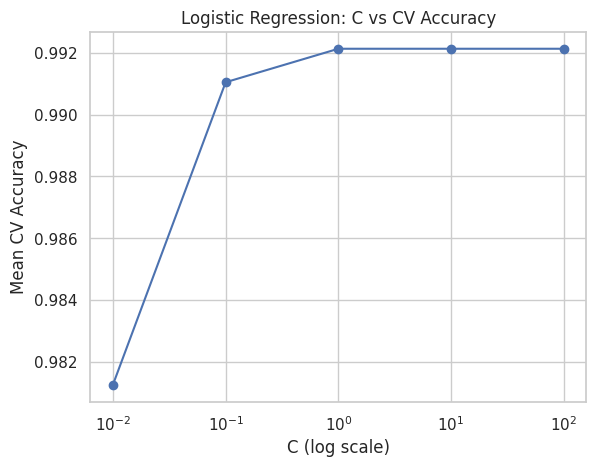

In [95]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt

# 1. Define grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100]
}

# 2. Grid search
grid_lr = GridSearchCV(
    LogisticRegression(max_iter=2000, random_state=42),
    param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_lr.fit(X_train, y_train)

# 3. Save best params
best_params_lr = grid_lr.best_params_
print("Best LR params:", best_params_lr)

# 4. Plot C vs CV accuracy
results_lr = pd.DataFrame(grid_lr.cv_results_)
plt.figure()
plt.plot(
    results_lr['param_C'].astype(float),
    results_lr['mean_test_score'],
    marker='o'
)
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Mean CV Accuracy')
plt.title('Logistic Regression: C vs CV Accuracy')
plt.grid(True)
plt.show()


## Decision Tree Hyperparameter Tuning

- **Define grid**:  
  - `max_depth`: [None, 5, 10, 20]  
  - `min_samples_split`: [2, 5, 10]  
  - `min_samples_leaf`: [1, 2, 5]

- **Grid Search**:  
  - Use `GridSearchCV` with `DecisionTreeClassifier(random_state=42)`, 5-fold CV, and accuracy scoring over the defined grid.

- **Fit & Select**:  
  - Train on `X_train`/`y_train` and retrieve `grid_dt.best_params_` for the optimal combination.

- **Visualize**:  
  - Aggregate mean CV accuracy by `max_depth` (excluding `None`) and plot to see how tree depth affects performance.

Best DT params: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}


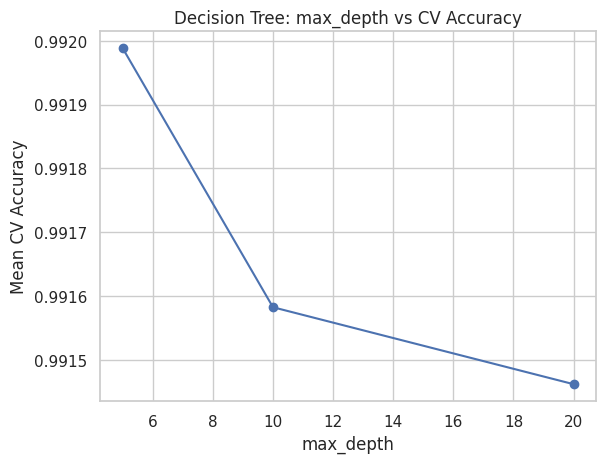

In [96]:
# 1. Define grid
param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# 2. Grid search
grid_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_dt,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_dt.fit(X_train, y_train)

# 3. Save best params
best_params_dt = grid_dt.best_params_
print("Best DT params:", best_params_dt)

# 4. Plot max_depth vs CV accuracy (averaged over other params)
results_dt = pd.DataFrame(grid_dt.cv_results_)
# drop rows where max_depth is None
dt_notnull = results_dt[results_dt['param_max_depth'].notnull()].copy()
mean_score_by_depth = dt_notnull.groupby('param_max_depth')['mean_test_score'].mean()

plt.figure()
plt.plot(
    mean_score_by_depth.index.astype(int),
    mean_score_by_depth.values,
    marker='o'
)
plt.xlabel('max_depth')
plt.ylabel('Mean CV Accuracy')
plt.title('Decision Tree: max_depth vs CV Accuracy')
plt.grid(True)
plt.show()


## SVM Hyperparameter Tuning

- **Define grid**:  
  - `C`: [0.1, 1, 10]  
  - `kernel`: [`linear`, `rbf`]  
  - `gamma`: [`scale`, `auto`]

- **Grid Search**:  
  - Use `GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)`

- **Fit & Best Params**:  
  - Train on `X_train`/`y_train` and read `grid_svm.best_params_` for the optimal settings.

- **Visualization**:  
  - Plot mean CV accuracy vs. `C` (log scale), with separate lines for each kernel to compare performance.  

Best SVM params: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


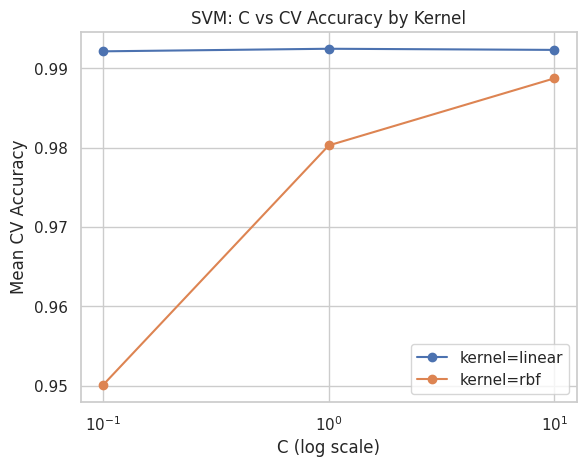

In [97]:
# 1. Define grid
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# 2. Grid search
grid_svm = GridSearchCV(
    SVC(random_state=42),
    param_grid_svm,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_svm.fit(X_train, y_train)

# 3. Save best params
best_params_svm = grid_svm.best_params_
print("Best SVM params:", best_params_svm)

# 4. Plot C vs CV accuracy for each kernel (averaged over gamma)
results_svm = pd.DataFrame(grid_svm.cv_results_)
plt.figure()
for kern in results_svm['param_kernel'].unique():
    df_k = results_svm[results_svm['param_kernel'] == kern]
    mean_score = df_k.groupby('param_C')['mean_test_score'].mean()
    plt.plot(
        mean_score.index.astype(float),
        mean_score.values,
        marker='o',
        label=f'kernel={kern}'
    )

plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Mean CV Accuracy')
plt.title('SVM: C vs CV Accuracy by Kernel')
plt.legend()
plt.grid(True)
plt.show()


#Ensemble

## Bagging Technique: BaggingClassifier with Decision Tree
We’ll train a Bagging ensemble of decision trees and evaluate on the held-out test set.


In [98]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Bagging with DT base estimator
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# Train on the full training data
bag.fit(X_train, y_train)

# Predict on the test set
y_pred_bag = bag.predict(X_test)

# Compute and save metrics
accuracy_test_bag     = accuracy_score(y_test, y_pred_bag)
precision_test_bag    = precision_score(y_test, y_pred_bag, average='weighted', zero_division=0)
recall_test_bag       = recall_score(y_test, y_pred_bag, average='weighted', zero_division=0)
f1_test_bag           = f1_score(y_test, y_pred_bag, average='weighted', zero_division=0)

# Print results
print(" Bagging Test Metrics")
print(f"Accuracy:  {accuracy_test_bag:.4f}")
print(f"Precision: {precision_test_bag:.4f}")
print(f"Recall:    {recall_test_bag:.4f}")
print(f"F1 Score:  {f1_test_bag:.4f}")


 Bagging Test Metrics
Accuracy:  0.9930
Precision: 0.9930
Recall:    0.9930
F1 Score:  0.9930


##Boosting


###Boosting Technique: AdaBoost
We’ll train an AdaBoost ensemble of decision trees and evaluate on the held-out test set.

In [99]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize AdaBoost with a DecisionTree base estimator
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)

# Train on the full training data
ada.fit(X_train, y_train)

# Predict on the test set
y_pred_ada = ada.predict(X_test)

# Compute and save metrics
accuracy_test_ada    = accuracy_score(y_test, y_pred_ada)
precision_test_ada   = precision_score(y_test, y_pred_ada, average='weighted', zero_division=0)
recall_test_ada      = recall_score(y_test, y_pred_ada, average='weighted', zero_division=0)
f1_test_ada          = f1_score(y_test, y_pred_ada, average='weighted', zero_division=0)

# Print results
print(" AdaBoost Test Metrics")
print(f"Accuracy:  {accuracy_test_ada:.4f}")
print(f"Precision: {precision_test_ada:.4f}")
print(f"Recall:    {recall_test_ada:.4f}")
print(f"F1 Score:  {f1_test_ada:.4f}")


 AdaBoost Test Metrics
Accuracy:  0.9939
Precision: 0.9939
Recall:    0.9939
F1 Score:  0.9939


### Boosting Technique: GradientBoosting
We’ll train a Gradient Boosting ensemble and evaluate on the held-out test set.


In [100]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Gradient Boosting
gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train on the full training data
gb.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb.predict(X_test)

# Compute and save metrics
accuracy_test_gb    = accuracy_score(y_test, y_pred_gb)
precision_test_gb   = precision_score(y_test, y_pred_gb, average='weighted', zero_division=0)
recall_test_gb      = recall_score(y_test, y_pred_gb, average='weighted', zero_division=0)
f1_test_gb          = f1_score(y_test, y_pred_gb, average='weighted', zero_division=0)

# Print results
print(" Gradient Boosting Test Metrics")
print(f"Accuracy:  {accuracy_test_gb:.4f}")
print(f"Precision: {precision_test_gb:.4f}")
print(f"Recall:    {recall_test_gb:.4f}")
print(f"F1 Score:  {f1_test_gb:.4f}")


 Gradient Boosting Test Metrics
Accuracy:  0.9945
Precision: 0.9945
Recall:    0.9945
F1 Score:  0.9945


### Boosting Technique: XGBoost


In [101]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize XGBoost
xgb_clf = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train on full training data
xgb_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_clf.predict(X_test)

# Compute and save metrics
accuracy_test_xgb   = accuracy_score(y_test, y_pred_xgb)
precision_test_xgb  = precision_score(y_test, y_pred_xgb, average='weighted', zero_division=0)
recall_test_xgb     = recall_score(y_test, y_pred_xgb, average='weighted', zero_division=0)
f1_test_xgb         = f1_score(y_test, y_pred_xgb, average='weighted', zero_division=0)

# Save params for later
best_params_xgb = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3
}

# Print results
print(" XGBoost Test Metrics")
print(f"Accuracy:  {accuracy_test_xgb:.4f}")
print(f"Precision: {precision_test_xgb:.4f}")
print(f"Recall:    {recall_test_xgb:.4f}")
print(f"F1 Score:  {f1_test_xgb:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 XGBoost Test Metrics
Accuracy:  0.9944
Precision: 0.9944
Recall:    0.9944
F1 Score:  0.9944


### Stacking Technique: Stacking


In [102]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define base estimators with best params
estimators = [
    ('lr', LogisticRegression(**best_params_lr, max_iter=2000, random_state=42)),
    ('dt', DecisionTreeClassifier(**best_params_dt, random_state=42)),
    ('svm', SVC(**best_params_svm, random_state=42, probability=True))
]

# Initialize Stacking
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000, random_state=42),
    cv=5,
    n_jobs=-1
)

# Train
stack.fit(X_train, y_train)

# Predict
y_pred_stack = stack.predict(X_test)

# Compute and save metrics
accuracy_test_stack   = accuracy_score(y_test, y_pred_stack)
precision_test_stack  = precision_score(y_test, y_pred_stack, average='weighted', zero_division=0)
recall_test_stack     = recall_score(y_test, y_pred_stack, average='weighted', zero_division=0)
f1_test_stack         = f1_score(y_test, y_pred_stack, average='weighted', zero_division=0)

## Save config
best_params_stack = {
    'estimators': ['lr', 'dt', 'svm'],
    'final_estimator': 'LogisticRegression',
    'cv': 5
}

# Print results
print(" Stacking Test Metrics")
print(f"Accuracy:  {accuracy_test_stack:.4f}")
print(f"Precision: {precision_test_stack:.4f}")
print(f"Recall:    {recall_test_stack:.4f}")
print(f"F1 Score:  {f1_test_stack:.4f}")


 Stacking Test Metrics
Accuracy:  0.9935
Precision: 0.9935
Recall:    0.9935
F1 Score:  0.9935


## Voting Technique: Voting(SOFT)

In [103]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Initialize Voting (soft voting)
voting = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(**best_params_lr, max_iter=2000, random_state=42)),
        ('dt', DecisionTreeClassifier(**best_params_dt, random_state=42)),
        ('svm', SVC(**best_params_svm, random_state=42, probability=True))
    ],
    voting='soft',
    n_jobs=-1
)

#Train
voting.fit(X_train, y_train)

#Predict
y_pred_voting = voting.predict(X_test)

#Compute and save metrics
accuracy_test_voting   = accuracy_score(y_test, y_pred_voting)
precision_test_voting  = precision_score(y_test, y_pred_voting, average='weighted', zero_division=0)
recall_test_voting     = recall_score(y_test, y_pred_voting, average='weighted', zero_division=0)
f1_test_voting         = f1_score(y_test, y_pred_voting, average='weighted', zero_division=0)

# Save config
best_params_voting = {
    'voting': 'soft'
}

# Print results
print(" Voting Test Metrics")
print(f"Accuracy:  {accuracy_test_voting:.4f}")
print(f"Precision: {precision_test_voting:.4f}")
print(f"Recall:    {recall_test_voting:.4f}")
print(f"F1 Score:  {f1_test_voting:.4f}")


 Voting Test Metrics
Accuracy:  0.9934
Precision: 0.9934
Recall:    0.9934
F1 Score:  0.9933


#Ensemble Base Models Metrics Comparison
Below is a summary table and a grouped bar chart comparing Accuracy, Precision, Recall, and F1 Score for all ensemble models.


,Accuracy,Precision,Recall,F1 Score
Bagging,0.992959,0.992954,0.992959,0.992956
AdaBoost,0.993934,0.993915,0.993934,0.993920
GradientBoost,0.994476,0.994464,0.994476,0.994464
XGBoost,0.994367,0.994359,0.994367,0.994355
Stacking,0.993501,0.993462,0.993501,0.993462
Voting,0.993393,0.993353,0.993393,0.993338


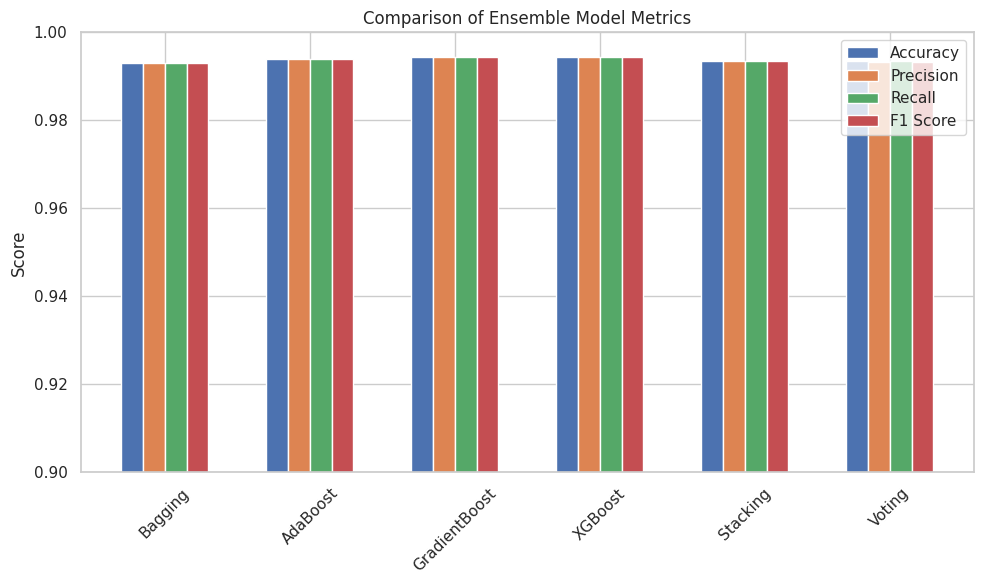

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assemble results
results = pd.DataFrame({
    'Accuracy':    [accuracy_test_bag, accuracy_test_ada, accuracy_test_gb, accuracy_test_xgb, accuracy_test_stack, accuracy_test_voting],
    'Precision':   [precision_test_bag, precision_test_ada, precision_test_gb, precision_test_xgb, precision_test_stack, precision_test_voting],
    'Recall':      [recall_test_bag, recall_test_ada, recall_test_gb, recall_test_xgb, recall_test_stack, recall_test_voting],
    'F1 Score':    [f1_test_bag, f1_test_ada, f1_test_gb, f1_test_xgb, f1_test_stack, f1_test_voting]
}, index=['Bagging','AdaBoost','GradientBoost','XGBoost','Stacking','Voting'])

#Display table
from IPython.display import display
display(results)

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(10,6))
width = 0.15
x = np.arange(len(results.index))
for i, col in enumerate(results.columns):
    ax.bar(x + i*width, results[col], width, label=col)

ax.set_xticks(x + width*1.5)
ax.set_xticklabels(results.index, rotation=45)
ax.set_ylabel('Score')
ax.set_title('Comparison of Ensemble Model Metrics')
ax.legend()
ax.set_ylim(0.9, 1.0)
plt.tight_layout()
plt.show()


#Hyperparameter Tuning

Random Search Hyperparameter Tuning for Ensembles
We’ll use `RandomizedSearchCV` to tune key hyperparameters for each ensemble. Best params will be saved in variables for later use.


In [105]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# BaggingClassifier (base: DecisionTree)
bag_param_dist = {
    'n_estimators': randint(50, 200),
    'max_samples': uniform(0.5, 0.5),
    'max_features': uniform(0.5, 0.5)
}
bag_rs = RandomizedSearchCV(
    bag,
    param_distributions=bag_param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
bag_rs.fit(X_train, y_train)
best_params_bag_rand = bag_rs.best_params_
print("Best Bagging params:", best_params_bag_rand)


# AdaBoostClassifier
ada_param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 1.0)
}
ada_rs = RandomizedSearchCV(
    ada,
    param_distributions=ada_param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
ada_rs.fit(X_train, y_train)
best_params_ada_rand = ada_rs.best_params_
print("Best AdaBoost params:", best_params_ada_rand)


# GradientBoostingClassifier
gb_param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 1.0),
    'max_depth': randint(2, 10),
    'subsample': uniform(0.5, 0.5)
}
gb_rs = RandomizedSearchCV(
    gb,
    param_distributions=gb_param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
gb_rs.fit(X_train, y_train)
best_params_gb_rand = gb_rs.best_params_
print("Best GradientBoost params:", best_params_gb_rand)


# XGBClassifier
xgb_param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.5),
    'max_depth': randint(2, 10),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}
xgb_rs = RandomizedSearchCV(
    xgb_clf,
    param_distributions=xgb_param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
xgb_rs.fit(X_train, y_train)
best_params_xgb_rand = xgb_rs.best_params_
print("Best XGBoost params:", best_params_xgb_rand)


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Bagging params: {'max_features': np.float64(0.5779972601681014), 'max_samples': np.float64(0.5290418060840998), 'n_estimators': 137}
Best AdaBoost params: {'learning_rate': np.float64(0.3845401188473625), 'n_estimators': 142}
Best GradientBoost params: {'learning_rate': np.float64(0.05666566321361543), 'max_depth': 5, 'n_estimators': 64, 'subsample': np.float64(0.728034992108518)}


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:56:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost params: {'colsample_bytree': np.float64(0.855670976374325), 'learning_rate': np.float64(0.40508777026560283), 'max_depth': 4, 'n_estimators': 54, 'subsample': np.float64(0.9631504392566745)}


In [106]:
# Evaluate Tuned Ensemble Models on Test Set

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# BaggingClassifier
bag_tuned = bag_rs.best_estimator_
y_pred_bag_tuned = bag_tuned.predict(X_test)
accuracy_test_bag_rand    = accuracy_score(y_test, y_pred_bag_tuned)
precision_test_bag_rand   = precision_score(y_test, y_pred_bag_tuned, average='weighted', zero_division=0)
recall_test_bag_rand      = recall_score(y_test, y_pred_bag_tuned, average='weighted', zero_division=0)
f1_test_bag_rand          = f1_score(y_test, y_pred_bag_tuned, average='weighted', zero_division=0)

print("🔻 Tuned Bagging Test Metrics")
print(f"Accuracy:  {accuracy_test_bag_rand:.4f}")
print(f"Precision: {precision_test_bag_rand:.4f}")
print(f"Recall:    {recall_test_bag_rand:.4f}")
print(f"F1 Score:  {f1_test_bag_rand:.4f}\n")

# AdaBoostClassifier
ada_tuned = ada_rs.best_estimator_
y_pred_ada_tuned = ada_tuned.predict(X_test)
accuracy_test_ada_rand    = accuracy_score(y_test, y_pred_ada_tuned)
precision_test_ada_rand   = precision_score(y_test, y_pred_ada_tuned, average='weighted', zero_division=0)
recall_test_ada_rand      = recall_score(y_test, y_pred_ada_tuned, average='weighted', zero_division=0)
f1_test_ada_rand          = f1_score(y_test, y_pred_ada_tuned, average='weighted', zero_division=0)

print("🔹 Tuned AdaBoost Test Metrics")
print(f"Accuracy:  {accuracy_test_ada_rand:.4f}")
print(f"Precision: {precision_test_ada_rand:.4f}")
print(f"Recall:    {recall_test_ada_rand:.4f}")
print(f"F1 Score:  {f1_test_ada_rand:.4f}\n")

#GradientBoostingClassifier
gb_tuned = gb_rs.best_estimator_
y_pred_gb_tuned = gb_tuned.predict(X_test)
accuracy_test_gb_rand    = accuracy_score(y_test, y_pred_gb_tuned)
precision_test_gb_rand   = precision_score(y_test, y_pred_gb_tuned, average='weighted', zero_division=0)
recall_test_gb_rand      = recall_score(y_test, y_pred_gb_tuned, average='weighted', zero_division=0)
f1_test_gb_rand          = f1_score(y_test, y_pred_gb_tuned, average='weighted', zero_division=0)

print(" Tuned Gradient Boosting Test Metrics")
print(f"Accuracy:  {accuracy_test_gb_rand:.4f}")
print(f"Precision: {precision_test_gb_rand:.4f}")
print(f"Recall:    {recall_test_gb_rand:.4f}")
print(f"F1 Score:  {f1_test_gb_rand:.4f}\n")

#XGBClassifier
xgb_tuned = xgb_rs.best_estimator_
y_pred_xgb_tuned = xgb_tuned.predict(X_test)
accuracy_test_xgb_rand    = accuracy_score(y_test, y_pred_xgb_tuned)
precision_test_xgb_rand   = precision_score(y_test, y_pred_xgb_tuned, average='weighted', zero_division=0)
recall_test_xgb_rand      = recall_score(y_test, y_pred_xgb_tuned, average='weighted', zero_division=0)
f1_test_xgb_rand          = f1_score(y_test, y_pred_xgb_tuned, average='weighted', zero_division=0)

print(" Tuned XGBoost Test Metrics")
print(f"Accuracy:  {accuracy_test_xgb_rand:.4f}")
print(f"Precision: {precision_test_xgb_rand:.4f}")
print(f"Recall:    {recall_test_xgb_rand:.4f}")
print(f"F1 Score:  {f1_test_xgb_rand:.4f}")


🔻 Tuned Bagging Test Metrics
Accuracy:  0.9932
Precision: 0.9932
Recall:    0.9932
F1 Score:  0.9931

🔹 Tuned AdaBoost Test Metrics
Accuracy:  0.9931
Precision: 0.9930
Recall:    0.9931
F1 Score:  0.9930

 Tuned Gradient Boosting Test Metrics
Accuracy:  0.9936
Precision: 0.9936
Recall:    0.9936
F1 Score:  0.9936

 Tuned XGBoost Test Metrics
Accuracy:  0.9934
Precision: 0.9934
Recall:    0.9934
F1 Score:  0.9934


In [107]:
best_bag  = bag_rs.best_estimator_
best_ada  = ada_rs.best_estimator_
best_gb   = gb_rs.best_estimator_
best_xgb  = xgb_rs.best_estimator_

# Compute test‐set accuracy for each
from sklearn.metrics import accuracy_score
import pandas as pd

accuracy_bag_rand  = accuracy_score(y_test, best_bag.predict(X_test))
accuracy_ada_rand  = accuracy_score(y_test, best_ada.predict(X_test))
accuracy_gb_rand   = accuracy_score(y_test, best_gb.predict(X_test))
accuracy_xgb_rand  = accuracy_score(y_test, best_xgb.predict(X_test))

#  Assemble results into a DataFrame
results_rand = pd.DataFrame({
    'Model': ['Bagging', 'AdaBoost', 'GradientBoost', 'XGBoost'],
    'Test Accuracy': [accuracy_bag_rand, accuracy_ada_rand, accuracy_gb_rand, accuracy_xgb_rand]
}).set_index('Model')

print(results_rand)


               Test Accuracy
Model                       
Bagging             0.993176
AdaBoost            0.993068
GradientBoost       0.993609
XGBoost             0.993393


#Comparison pre- and post-tuning results for all models

In [108]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Reconstruct best estimators
best_lr    = grid_lr.best_estimator_
best_dt    = grid_dt.best_estimator_
best_svm   = grid_svm.best_estimator_
best_bag   = bag_rs.best_estimator_
best_ada   = ada_rs.best_estimator_
best_gb    = gb_rs.best_estimator_
best_xgb   = xgb_rs.best_estimator_
best_stack = stack
best_voting = voting

# Compute post-tuning metrics
post = {}
for name, est in [
    ('Logistic Regression', best_lr),
    ('Decision Tree', best_dt),
    ('SVM', best_svm),
    ('Bagging', best_bag),
    ('AdaBoost', best_ada),
    ('GradientBoost', best_gb),
    ('XGBoost', best_xgb),
    ('Stacking', best_stack),
    ('Voting', best_voting)
]:
    y_pred = est.predict(X_test)
    post[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
        'F1 Score': f1_score(y_test, y_pred, average='weighted', zero_division=0)
    }

# Pre-tuning metrics from earlier variables
pre = {
    'Logistic Regression': {'Accuracy': accuracy_test_LR, 'Precision': precision_test_LR, 'Recall': recall_test_LR, 'F1 Score': f1_score_validation_LR},  # or f1_test_LR
    'Decision Tree':       {'Accuracy': accuracy_test_DT, 'Precision': precision_test_DT, 'Recall': recall_test_DT, 'F1 Score': f1_score_validation_DT},
    'SVM':                  {'Accuracy': accuracy_test_SVM, 'Precision': precision_test_SVM, 'Recall': recall_test_SVM, 'F1 Score': f1_score_validation_SVM},
    'Bagging':             {'Accuracy': accuracy_test_bag, 'Precision': precision_test_bag, 'Recall': recall_test_bag, 'F1 Score': f1_test_bag},
    'AdaBoost':            {'Accuracy': accuracy_test_ada, 'Precision': precision_test_ada, 'Recall': recall_test_ada, 'F1 Score': f1_test_ada},
    'GradientBoost':       {'Accuracy': accuracy_test_gb, 'Precision': precision_test_gb, 'Recall': recall_test_gb, 'F1 Score': f1_test_gb},
    'XGBoost':             {'Accuracy': accuracy_test_xgb, 'Precision': precision_test_xgb, 'Recall': recall_test_xgb, 'F1 Score': f1_test_xgb},
    'Stacking':            {'Accuracy': accuracy_test_stack, 'Precision': precision_test_stack, 'Recall': recall_test_stack, 'F1 Score': f1_test_stack},
    'Voting':              {'Accuracy': accuracy_test_voting, 'Precision': precision_test_voting, 'Recall': recall_test_voting, 'F1 Score': f1_test_voting},
}

# Build comparison DataFrame
df_pre  = pd.DataFrame(pre).T
df_post = pd.DataFrame(post).T
df_all = pd.concat([
    df_pre.add_prefix('Pre-'),
    df_post.add_prefix('Post-')
], axis=1)

# Display comparison table
from IPython.display import display
print("## Pre vs Post-Tuning Metrics")
display(df_all)

# Best hyperparameters
best_params = {
    'Logistic Regression': best_params_lr,
    'Decision Tree': best_params_dt,
    'SVM': best_params_svm,
    'Bagging': best_params_bag_rand,
    'AdaBoost': best_params_ada_rand,
    'GradientBoost': best_params_gb_rand,
    'XGBoost': best_params_xgb_rand,
    'Stacking': best_params_stack,
    'Voting': best_params_voting
}
print("\n## Best Hyperparameters per Model")
display(pd.Series(best_params, name='Best Parameters').to_frame())


## Pre vs Post-Tuning Metrics


,Pre-Accuracy,Pre-Precision,Pre-Recall,Pre-F1 Score,Post-Accuracy,Post-Precision,Post-Recall,Post-F1 Score
Logistic Regression,0.992959,0.992916,0.992959,0.994555,0.992959,0.992916,0.992959,0.992914
Decision Tree,0.992201,0.992175,0.992201,0.993482,0.992851,0.992823,0.992851,0.992833
SVM,0.980178,0.967863,0.980178,0.975690,0.993934,0.993934,0.993934,0.993859
Bagging,0.992959,0.992954,0.992959,0.992956,0.993176,0.993158,0.993176,0.993102
AdaBoost,0.993934,0.993915,0.993934,0.993920,0.993068,0.993039,0.993068,0.993019
GradientBoost,0.994476,0.994464,0.994476,0.994464,0.993609,0.993592,0.993609,0.993589
XGBoost,0.994367,0.994359,0.994367,0.994355,0.993393,0.993377,0.993393,0.993384
Stacking,0.993501,0.993462,0.993501,0.993462,0.993501,0.993462,0.993501,0.993462
Voting,0.993393,0.993353,0.993393,0.993338,0.993393,0.993353,0.993393,0.993338



## Best Hyperparameters per Model


,Best Parameters
Logistic Regression,{'C': 1}
Decision Tree,"{'max_depth': 10, 'min_samples_leaf': 5, 'min_..."
SVM,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}"
Bagging,"{'max_features': 0.5779972601681014, 'max_samp..."
AdaBoost,"{'learning_rate': 0.3845401188473625, 'n_estim..."
GradientBoost,"{'learning_rate': 0.05666566321361543, 'max_de..."
XGBoost,"{'colsample_bytree': 0.855670976374325, 'learn..."
Stacking,"{'estimators': ['lr', 'dt', 'svm'], 'final_est..."
Voting,{'voting': 'soft'}


## Visualization: Pre vs Post-Tuning Metrics
Below we generate grouped bar charts for each metric, showing pre- vs post-tuning performance across all models.

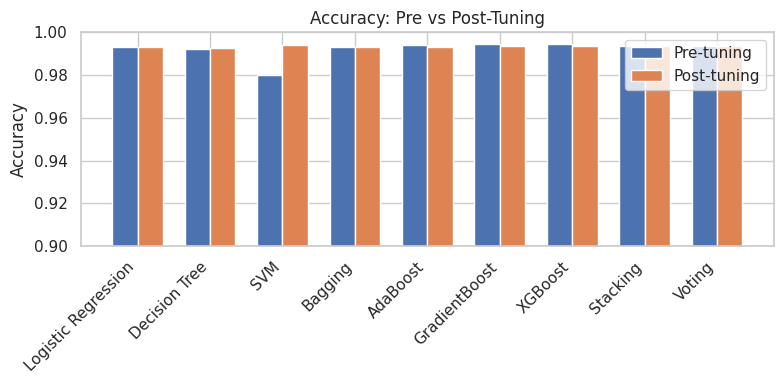

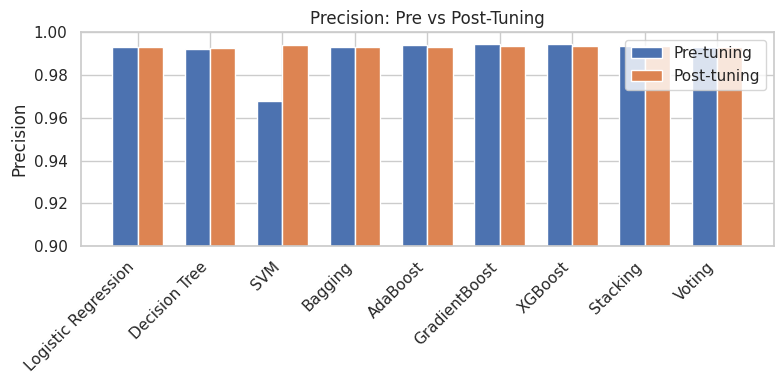

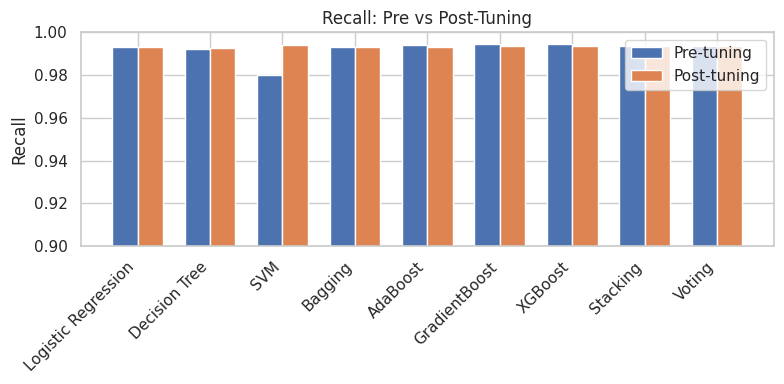

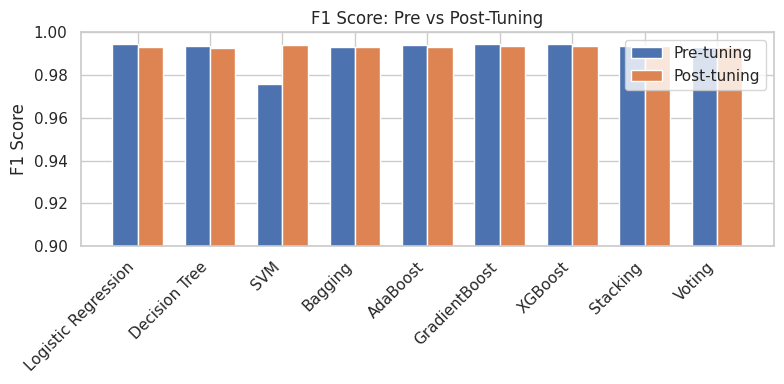

In [109]:
import matplotlib.pyplot as plt
import numpy as np

models = df_all.index.tolist()
metrics = ['Accuracy','Precision','Recall','F1 Score']
x = np.arange(len(models))
width = 0.35

for metric in metrics:
    pre_vals  = df_all[f'Pre-{metric}'].values
    post_vals = df_all[f'Post-{metric}'].values

    plt.figure(figsize=(8,4))
    plt.bar(x - width/2, pre_vals,  width, label='Pre-tuning')
    plt.bar(x + width/2, post_vals, width, label='Post-tuning')

    plt.xticks(x, models, rotation=45, ha='right')
    plt.ylabel(metric)
    plt.title(f'{metric}: Pre vs Post-Tuning')
    plt.ylim(0.9, 1.0)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Model Ranking: Best to Worst by Post-Tuning Accuracy


In [112]:
# 1. Remove the SVM row
df_no_svm = df_all.drop('SVM', errors='ignore')

# 2. Rank by post-tuning accuracy
ranked_no_svm = df_no_svm.sort_values('Post-Accuracy', ascending=False)

# 3. Display full table
from IPython.display import display
print("## Models Ranked by Post-Tuning Accuracy (excluding SVM)\n")
display(ranked_no_svm)

# 4. Show just the ranking and accuracy
print("\n## Ranking and Post-Tuning Accuracy")
display(ranked_no_svm['Post-Accuracy'])

# 5. Top model now without SVM
best_model = ranked_no_svm.index[0]
print(f"\nBest Model (excl. SVM): {best_model} with Post-Tuning Accuracy = {ranked_no_svm.loc[best_model, 'Post-Accuracy']:.4f}")


## Models Ranked by Post-Tuning Accuracy (excluding SVM)



,Pre-Accuracy,Pre-Precision,Pre-Recall,Pre-F1 Score,Post-Accuracy,Post-Precision,Post-Recall,Post-F1 Score
GradientBoost,0.994476,0.994464,0.994476,0.994464,0.993609,0.993592,0.993609,0.993589
Stacking,0.993501,0.993462,0.993501,0.993462,0.993501,0.993462,0.993501,0.993462
Voting,0.993393,0.993353,0.993393,0.993338,0.993393,0.993353,0.993393,0.993338
XGBoost,0.994367,0.994359,0.994367,0.994355,0.993393,0.993377,0.993393,0.993384
Bagging,0.992959,0.992954,0.992959,0.992956,0.993176,0.993158,0.993176,0.993102
AdaBoost,0.993934,0.993915,0.993934,0.993920,0.993068,0.993039,0.993068,0.993019
Logistic Regression,0.992959,0.992916,0.992959,0.994555,0.992959,0.992916,0.992959,0.992914
Decision Tree,0.992201,0.992175,0.992201,0.993482,0.992851,0.992823,0.992851,0.992833



## Ranking and Post-Tuning Accuracy


,Post-Accuracy
GradientBoost,0.993609
Stacking,0.993501
Voting,0.993393
XGBoost,0.993393
Bagging,0.993176
AdaBoost,0.993068
Logistic Regression,0.992959
Decision Tree,0.992851



Best Model (excl. SVM): GradientBoost with Post-Tuning Accuracy = 0.9936
